## A. BUSINESS UNDERSTANDING

# 1. CONTEXT

Along with the increase in human activity, the existence of cars has become a necessity. On the other hand, the price of new cars is getting higher and people are looking for alternatives to buy used cars that are still in good condition and suitable for use. 
Determining the price of a used car is different from determining the price of a new car which already has a standard factory price. The process of determining used car prices is influenced by various factors such as manufacturing year, mileage, engine size, and so on. This causes the process of predicting used car prices to take a long time. 

Therefore, to speed up the process of predicting used car prices, it can be done using machine learning. Machine Learning has the ability to learn from previous transaction data and this will become a model that can be used to provide predictions of used car prices according to existing criteria.
    
In this case study, machine learning is used to predict the price of used cars sold on buying and selling platforms in Saudi Arabia. This platform brings together sellers and buyers on one website. Sellers can offer used cars and determine the price of the car themselves according to the quality of the car.

# 2. PROBLEM STATEMENT

One of the problems that often occurs in the business of buying and selling used cars is the uncertainty of the selling price of the car. This is a problem not only for buyers but also for car sellers. 
For sellers, if they set a price that is too high, it will make it difficult to sell the car. On the other hand, if sellers set the price too low, they may experience a loss. 
For buyers who do not have adequate knowledge about car prices, it will be very difficult to decide to buy a used car and cause a loss of time for researching the used car. 

# 3. GOALS

Based on the problems, a machine learning model is needed to predict the price of used cars based on their specifications. The price predicted by the model will be a reference for car sellers and buyers when making transactions. The aim is to create competitive used car prices and make the decision-making process between sellers and buyers faster and more efficient.

# 4. ANALYTIC APPROACH

In creating a model that can predict the price of a used car, first analyze what specifications can influence the price. Then various kinds of regression models are created which aim to determine prices, and through these models the best model is determined which provides the best metrics which will be used as the final model.

# 5. METRIC EVALUATION

MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), R^2 (R-Square), and MAPE(Mean Absolute Percentage Error) are evaluation metrics commonly used to measure the performance of regression or prediction models. Here is a brief explanation of each of these metrics: 

**1. Mean Absolute Error (MAE)**
<img src = 'https://miro.medium.com/v2/resize:fit:723/1*9BhnZiaHkApC-gQt3rYpMQ.png'>
- MAE is used to measure the average absolute error between the predicted value and actual value.
- A smaller MAE value indicates a higher level of accuracy.

**2. Root Mean Squared Error (RMSE)**
<img src = 'https://arize.com/wp-content/uploads/2023/08/RMSE-equation.png'>
- RMSE is used to measure the extent to which prediction errors are spread over the actual values.
- A smaller RMSE value indicates a higher level of accuracy.

**3. R-Squared (R2)**
![gambar rsuared](https://i0.wp.com/maglearning.id/wp-content/uploads/2019/02/rumus-r-square.jpg?resize=511%2C114&ssl=1)
- R-square is used to show how much the independent variable influences the dependent variable
- The R-Squared value ranges from 0-1. The higher the R-Squared value, the higher the level of accuracy. 

**4. MAPE (Mean Absolute Percentage Error)**   
<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20211120204908/mapeformula.png'>

- MAPE is the average of the absolute percentage errors between predicted values and actual values.   
- It is useful to measure errors in percentage form, so they are not affected by the scale of the data.

## B. DATA UNDERSTANDING & CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Load Dataset
data = pd.read_csv("data_saudi_used_cars.csv")
data

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage  Negotiable   Price  
0      Standard  2013          1.4   421000        True       0  
1          Full  2014          8.0    80000       False  120000  
2          Full  2015          5.0   140000       False  260000  
3     Semi Full  2015          2.4   220000       False   42000  
4          Full  2020          4.0    49000        True       0  
...         ...   ...          ...      ...         ...     ...  
5619   Standard  2018          2.5    78794       False   68000  
5620  Semi Full  2020          2.5    58000        True       0  
5621       Full  2016          5.3    48000       False  145000  
5622       Full  2016          2.5    81000       False  154000  
5623       Full  2017          3.5   115000        True       0  

[5624 rows x 11 columns]


>## **Columns Description**

| Column       | Description                                            |
|--------------|--------------------------------------------------------|
| Type         | Type of used car.                                      |
| Region       | The region in which the used car was offered for sale. |
| Make         | The company name.                                      |
| Gear_Type    | Gear type size of used car.                            |
| Origin       | Origin of used car.                                    |
| Options      | Options of used car.                                   |
| Year         | Manufacturing year.                                    |
| Engine_Size  | The engine size of used car.                           |
| Mileage      | Mileage of used car.                                   |
| Negotiable   | True if the price is 0, that means it is negotiable.   |
| Price        | Used car price.                                        |

In [3]:
# Count and Datatype for each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
display(data.describe(), data.describe(include=object))

Year  Engine_Size       Mileage          Price
count  5624.000000  5624.000000  5.624000e+03    5624.000000
mean   2014.101885     3.295430  1.509234e+05   53074.058144
std       5.791606     1.515108  3.828360e+05   70155.340614
min    1963.000000     1.000000  1.000000e+02       0.000000
25%    2012.000000     2.000000  3.800000e+04       0.000000
50%    2016.000000     3.000000  1.030000e+05   36500.000000
75%    2018.000000     4.500000  1.960000e+05   72932.500000
max    2022.000000     9.000000  2.000000e+07  850000.000000

Type  Region    Make  Gear_Type Origin Options
count           5624    5624    5624       5624   5624    5624
unique           347      27      58          2      4       3
top     Land Cruiser  Riyadh  Toyota  Automatic  Saudi    Full
freq             269    2272    1431       4875   4188    2233

>## Missing Values

In [5]:
print('Missing values status:', data.isnull().values.any())
missing_values = pd.DataFrame(data.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / data.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


index  Total Null Values  Percentage
0          Type                  0         0.0
1        Region                  0         0.0
2          Make                  0         0.0
3     Gear_Type                  0         0.0
4        Origin                  0         0.0
5       Options                  0         0.0
6          Year                  0         0.0
7   Engine_Size                  0         0.0
8       Mileage                  0         0.0
9    Negotiable                  0         0.0
10        Price                  0         0.0

In [6]:
# Check Unique Values exist in dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(data):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in (data.columns)]
    data_unique['Unique'] = [data[col].unique() for col in (data.columns)] 
    return data_unique

unique_data(data)

Columns  Unique Count  \
0          Type           347   
1        Region            27   
2          Make            58   
3     Gear_Type             2   
4        Origin             4   
5       Options             3   
6          Year            50   
7   Engine_Size            71   
8       Mileage          1716   
9    Negotiable             2   
10        Price           467   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique  
0   [Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]  
2                                                                                                                                                                                                                                                                                                 [Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

>## Duplicate Data

In [7]:
# check for duplicate rows
duplicates = data.duplicated().sum()
print('Number of duplicate rows:', duplicates)

Number of duplicate rows: 4


In [8]:
#  check for duplicate names in subset columns
duplicate_names = data[data.duplicated(subset=[
                                            'Type',
                                            'Region',
                                            'Make',
                                            'Gear_Type',
                                            'Origin',
                                            'Options',
                                            'Year',
                                            'Engine_Size',
                                            'Mileage',
                                            'Negotiable',
                                            'Price'
                                            ], keep=False)]

# display table and number of duplicate names
display(duplicate_names)

Type  Region     Make  Gear_Type Origin   Options  Year  Engine_Size  \
236   Sonata  Jeddah  Hyundai  Automatic  Saudi  Standard  2020          2.4   
540      Rio  Riyadh      Kia  Automatic  Saudi  Standard  2016          1.4   
953      Rio  Riyadh      Kia  Automatic  Saudi  Standard  2016          1.4   
2012  Tucson  Dammam  Hyundai  Automatic  Saudi  Standard  2016          2.0   
3631   Camry  Riyadh   Toyota  Automatic  Saudi      Full  2013          2.5   
4646  Sonata  Jeddah  Hyundai  Automatic  Saudi  Standard  2020          2.4   
4933  Tucson  Dammam  Hyundai  Automatic  Saudi  Standard  2016          2.0   
5267   Camry  Riyadh   Toyota  Automatic  Saudi      Full  2013          2.5   

      Mileage  Negotiable  Price  
236       100       False  72910  
540    270000       False  25000  
953    270000       False  25000  
2012   155000       False  45000  
3631   185000        True      0  
4646      100       False  72910  
4933   155000       False  45000  
5267   185000        True      0

In [9]:
# make a backup copy of data df
df = data.copy(deep=True)

In [10]:
# drop duplicate
df.drop_duplicates()

Type          Region          Make  Gear_Type  \
0                 Corolla            Abha        Toyota     Manual   
1                   Yukon          Riyadh           GMC  Automatic   
2             Range Rover          Riyadh    Land Rover  Automatic   
3                  Optima  Hafar Al-Batin           Kia  Automatic   
4                      FJ          Riyadh        Toyota  Automatic   
5                     CX3            Abha         Mazda  Automatic   
6               Cayenne S          Riyadh       Porsche  Automatic   
7                  Sonata          Riyadh       Hyundai  Automatic   
8                  Avalon          Riyadh        Toyota  Automatic   
9                      LS           Aseer         Lexus  Automatic   
10                   C300          Makkah      Chrysler  Automatic   
11           Land Cruiser          Riyadh        Toyota  Automatic   
12                     LS          Dammam         Lexus  Automatic   
13                     FJ          Riyadh        Toyota  Automatic   
14                  Hilux           Yanbu        Toyota  Automatic   
15           Land Cruiser           Aseer        Toyota     Manual   
16           Land Cruiser         Al-Baha        Toyota     Manual   
17           Land Cruiser          Riyadh        Toyota  Automatic   
18                 Tucson          Jeddah       Hyundai  Automatic   
19                Caprice          Riyadh     Chevrolet  Automatic   
20                  Sunny          Riyadh        Nissan     Manual   
21                 Pajero          Riyadh    Mitsubishi  Automatic   
22           Land Cruiser            Hail        Toyota  Automatic   
23                  Azera          Riyadh       Hyundai  Automatic   
24                  Focus          Khobar          Ford  Automatic   
25                      5         Al-Baha            MG  Automatic   
26                  Spark          Dammam     Chevrolet  Automatic   
27                  Camry          Riyadh        Toyota  Automatic   
28             Pathfinder         Al-Ahsa        Nissan  Automatic   
29                 Accent          Riyadh       Hyundai  Automatic   
30                     ML          Jeddah      Mercedes  Automatic   
31                Corolla           Jazan        Toyota  Automatic   
32                  Tahoe          Riyadh     Chevrolet  Automatic   
33                  Yaris  Hafar Al-Batin        Toyota  Automatic   
34               Suburban          Jeddah     Chevrolet  Automatic   
35                      A          Riyadh      Mercedes  Automatic   
36                 Altima           Aseer        Nissan  Automatic   
37                  Tahoe          Riyadh     Chevrolet  Automatic   
38               Traverse          Riyadh     Chevrolet  Automatic   
39             Expedition          Riyadh          Ford  Automatic   
40                  Yaris          Riyadh        Toyota  Automatic   
41               Senta fe          Riyadh       Hyundai  Automatic   
42                   C300  Hafar Al-Batin      Chrysler  Automatic   
43                Liberty       Al-Medina          Jeep  Automatic   
44                      3          Dammam         Mazda  Automatic   
45                      X          Jeddah           BMW  Automatic   
46                Elantra            Abha       Hyundai  Automatic   
47    Land Cruiser Pickup          Riyadh        Toyota     Manual   
48                Elantra          Riyadh       Hyundai     Manual   
49                    VTC          Riyadh        Nissan     Manual   
50                 Malibu            Abha     Chevrolet  Automatic   
51                  The 5          Jeddah           BMW  Automatic   
52                 Tucson       Al-Medina       Hyundai  Automatic   
53                     A8          Riyadh          Audi  Automatic   
54                  Tahoe          Riyadh     Chevrolet  Automatic   
55                 Patrol          Riyadh        Nissan  Automatic   
56                 Sonata      

>## Data Distribution

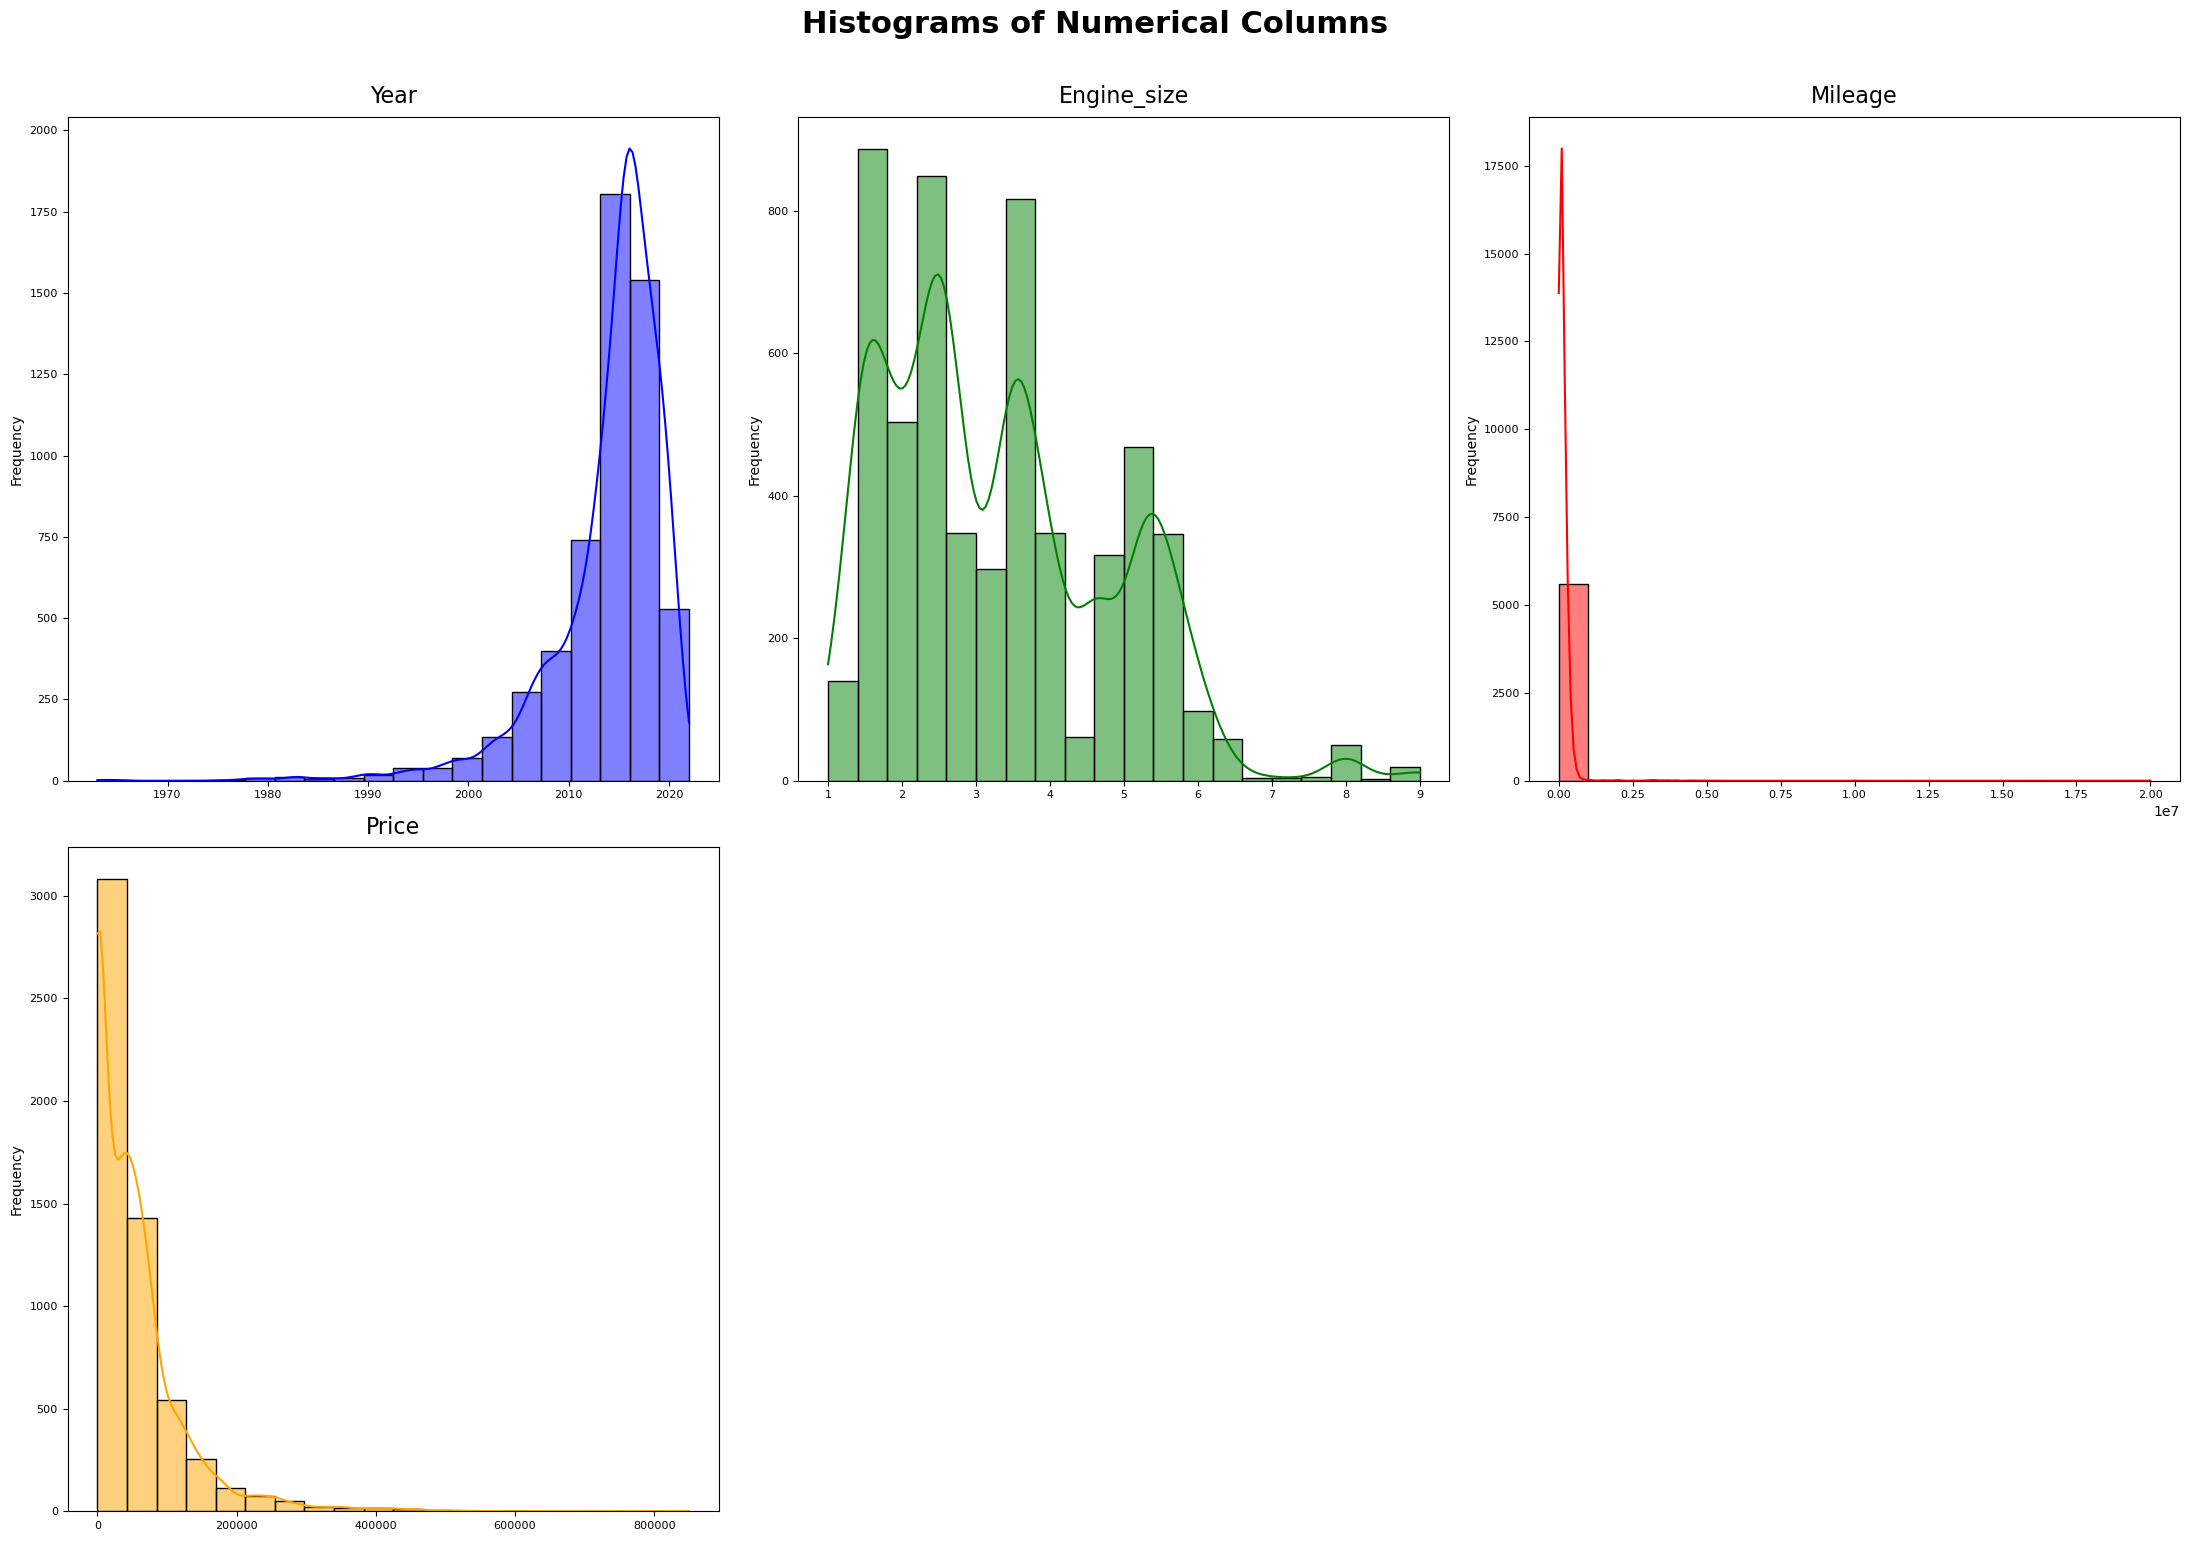

In [11]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 3)) 

# Create the subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(22, 8 * n_rows))
axes = axes.flatten()

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown']

# Plot histograms for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)  
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=16, pad=10)  
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Frequency') 
    axes[i].tick_params(axis='both', labelsize=8)  

# Remove unused subplots if the number of plots is odd
for j in range(n_plots, n_rows * 3):
    fig.delaxes(axes[j])


plt.suptitle('Histograms of Numerical Columns', fontsize=22, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

1. Year: The histogram shows a left-skewed distribution, indicating that more recent years have higher frequencies. This is not a normal distribution.

2. Engine HP: The histogram displays multiple peaks and is not symmetric, indicating it’s not normally distributed.

3. Mileage: The histogram is right-skewed, meaning lower mileage cars are more frequent in this dataset. This is not a normal distribution.

4. Price: The histogram is also right-skewed, indicating that cars with lower prices are more common. This is not a normal distribution.

>## Outlier

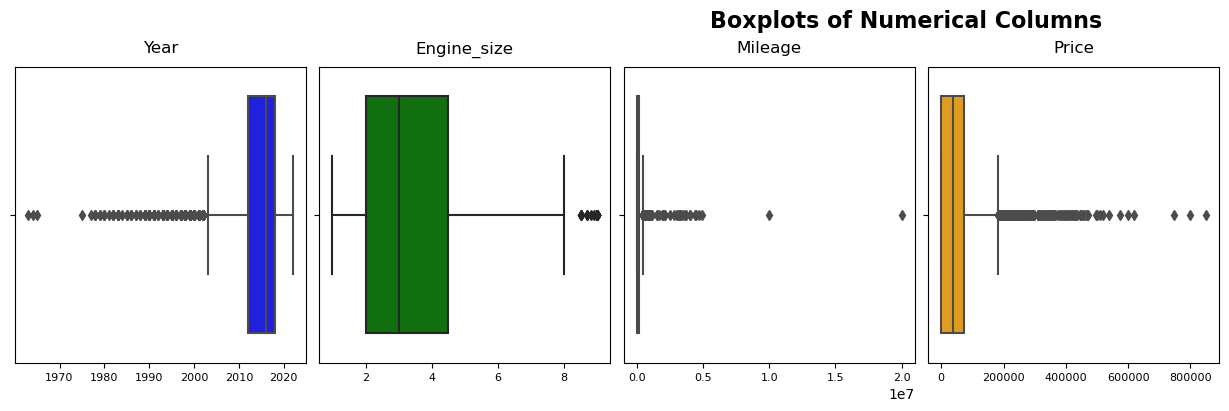

In [12]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 6))  

# Create the subplots dynamically based on the number of plots
fig, axes = plt.subplots(n_rows, 6, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Define a list of colors for the boxplots
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Plot boxplots for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)  
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=12, pad=10)  
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  
    axes[i].tick_params(axis='both', labelsize=8)  


# Remove excess subplots
for j in range(n_plots, n_rows * 6):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Columns', fontsize=16, fontweight='bold')
plt.show()

**The boxplots can use to identify the outliers.**

1. Year: The boxplot shows a concentration of data around years 2000 to 2010 with some outliers before year 1990.

2. Engine Size: The boxplot indicates most engine sizes are between approximately 4 to almost 6 with no visible outliers.

3. Mileage: The boxplot displays a concentration around lower mileage values but has several outlier points at higher mileage.

4. Price: The boxplot shows that most car prices are concentrated around lower values but there are several outlier points at higher prices.

In [13]:
# Dictionary to store outliers' information
outliers_info = {}

# List of numerical columns
numerical_columns = ['Year', 'Engine_Size', 'Mileage', 'Price']

for column in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  
        'outliers_indices': outliers.index.tolist()  
    }


# summary for outliers_summary

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('bounds', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table

1. Year: There are 246 outliers. Cars manufactured before 2003 or after 2027 are considered outliers.

2. Engine Size: There are 23 outliers. Cars with engine sizes less than -2 or greater than 8 are considered outliers.

3. Mileage: There are 175 outliers. Cars with mileage less than -199,000 or greater than 433,000 are considered outliers.

4. Price: There are 261 outliers. Cars with prices less than -109,500 or greater than 182,500 are considered outliers.

>### Outliers detail in Year column

Type          Region       Make  Gear_Type       Origin  \
5012                Other          Riyadh       Ford     Manual        Saudi   
2262               Impala         Al-Ahsa  Chevrolet  Automatic        Other   
617           Thunderbird          Riyadh       Ford  Automatic        Other   
1871                POS24       Al-Medina   Mercedes     Manual        Saudi   
104                 C5700  Hafar Al-Batin        GMC     Manual        Saudi   
1363           New Yorker          Riyadh   Chrysler  Automatic        Other   
3238               Patrol            Abha     Nissan     Manual        Saudi   
3082      Land Cruiser 70          Riyadh     Toyota     Manual        Saudi   
5147               Bronco          Jeddah       Ford  Automatic        Other   
3188               Sierra          Riyadh        GMC     Manual        Saudi   
663                 Other          Qassim      Other     Manual        Other   
4748  Land Cruiser Pickup         Al-Baha     Toyota     Manual        Other   
4259                    S          Riyadh   Mercedes  Automatic        Other   
5553               Sierra          Jeddah        GMC     Manual        Saudi   
15           Land Cruiser           Aseer     Toyota     Manual  Gulf Arabic   

        Options  Year  Engine_Size  Mileage  Negotiable   Price  
5012   Standard  1963          1.0      300       False   22000  
2262       Full  1964          1.2   100000       False   75000  
617        Full  1965          8.0    25000        True       0  
1871       Full  1975          8.0    22552        True       0  
104    Standard  1977          1.5  4358765        True       0  
1363       Full  1978          6.6    52000        True       0  
3238   Standard  1978          4.0    30000       False   28000  
3082   Standard  1978          4.0   400000       False   18000  
5147       Full  1979          4.9    26000        True       0  
3188   Standard  1979          5.3      100        True       0  
663    Standard  1980          2.4     2500       False  220000  
4748   Standard  1980          4.0    44000        True       0  
4259   Standard  1980          3.0   160000       False   40000  
5553  Semi Full  1981          5.3      350        True       0  
15    Semi Full  1982          4.6   340000        True       0

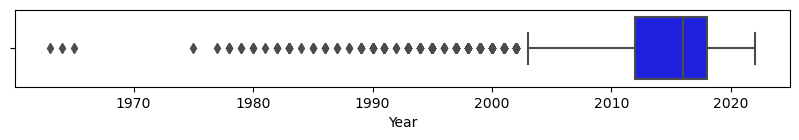

In [14]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df["Year"],color= 'blue')

# Sort the DataFrame by the 'Year' column in ascending order
df_sorted = df.sort_values(by='Year', ascending=True)
df_sorted.head(15)

>### Outlier detail in Engine_Size column

Type  Region      Make  Gear_Type       Origin  \
3525                   FJ    Hail    Toyota  Automatic        Saudi   
3435             Suburban    Taef       GMC  Automatic        Saudi   
3459                   ML    Arar  Mercedes  Automatic        Saudi   
3235  Land Cruiser Pickup  Jeddah    Toyota     Manual  Gulf Arabic   
1076         Land Cruiser    Abha    Toyota     Manual        Saudi   

        Options  Year  Engine_Size  Mileage  Negotiable  Price  
3525       Full  2014          9.0   308000       False  75000  
3435       Full  1999          9.0   220000        True      0  
3459       Full  1995          9.0   300000        True      0  
3235       Full  2020          9.0    30000        True      0  
1076  Semi Full  1994          9.0   402000        True      0

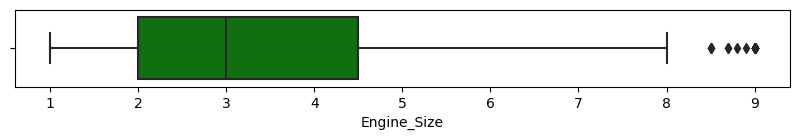

In [15]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df["Engine_Size"],color= 'green')

# Sort the DataFrame by the 'Year' column in descending order
df_sorted = df.sort_values(by='Engine_Size', ascending=False)
df_sorted.head()

>### Outlier Details in Mileage Column

Type   Region       Make  Gear_Type Origin    Options  Year  \
3403   Optra   Riyadh  Chevrolet     Manual  Other  Semi Full  2009   
1224   POS24    Aseer   Mercedes     Manual  Other       Full  1983   
5514  Aurion   Qassim     Toyota  Automatic  Saudi   Standard  2010   
1285   Tahoe  Al-Jouf  Chevrolet  Automatic  Saudi  Semi Full  2012   
572    Camry    Yanbu     Toyota  Automatic  Other       Full  1998   

      Engine_Size   Mileage  Negotiable  Price  
3403          1.6  20000000       False   9000  
1224          8.0   9999999        True      0  
5514          3.5   4900000        True      0  
1285          5.3   4691232        True      0  
572           2.5   4500000       False  15000

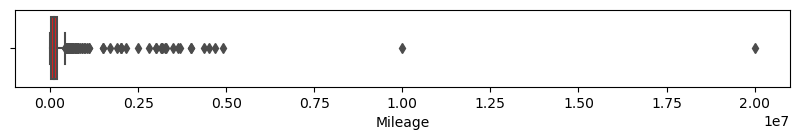

In [16]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df["Mileage"],color= 'red')

# Sort the DataFrame by the 'Year' column in descending order
df_sorted = df.sort_values(by='Mileage', ascending=False)
df_sorted.head()

>### Outlier Details in Price Column

Type  Region         Make  Gear_Type       Origin Options  Year  \
3513     Bentayga  Dammam      Bentley  Automatic        Saudi    Full  2019   
4684            G  Riyadh     Mercedes  Automatic        Other    Full  2019   
4273            S  Dammam     Mercedes  Automatic  Gulf Arabic    Full  2021   
2120        Ghost  Dammam  Rolls-Royce  Automatic        Saudi    Full  2016   
4653  Range Rover  Riyadh   Land Rover  Automatic        Other    Full  2019   

      Engine_Size  Mileage  Negotiable   Price  
3513          6.0    13000       False  850000  
4684          4.0    39000       False  800000  
4273          3.0     2500       False  748000  
2120          6.0    40000       False  620000  
4653          5.0     4200       False  599000

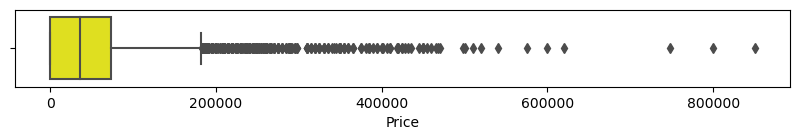

In [17]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df["Price"],color= 'yellow')

# Sort the DataFrame by the 'Year' column in descending order
df_sorted = df.sort_values(by='Price', ascending=False)
df_sorted.head()

>### Reduce the Range of Outliers

In [18]:
df = df[~((df['Year'] < 1970) | (df['Engine_Size'] > 8) | (df['Mileage'] > 9000000) | (df['Price'] > 500000))]
df.head()

Type          Region        Make  Gear_Type       Origin    Options  \
0      Corolla            Abha      Toyota     Manual        Saudi   Standard   
1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
4           FJ          Riyadh      Toyota  Automatic        Saudi       Full   

   Year  Engine_Size  Mileage  Negotiable   Price  
0  2013          1.4   421000        True       0  
1  2014          8.0    80000       False  120000  
2  2015          5.0   140000       False  260000  
3  2015          2.4   220000       False   42000  
4  2020          4.0    49000        True       0

>## Anomaly Data

After I found out from several e-commerce used cars in Saudi Arabia, the price with the lower limit value was 5000 SAR (Saudi Arabian Riyals). Therefore, cars price below 5000 SAR will be delete to remove anomaly data. 
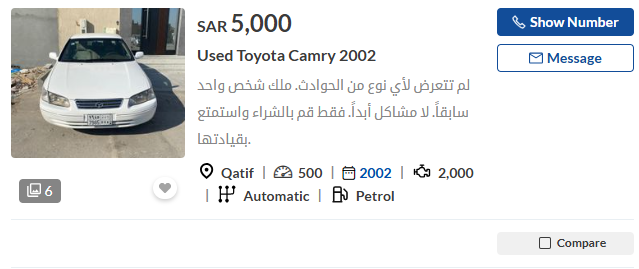
Source: https://ksa.yallamotor.com/used-cars/under-10000-

In [19]:
df = df[df['Price'] != 0]
df.head()

Type          Region        Make  Gear_Type       Origin    Options  \
1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
5          CX3            Abha       Mazda  Automatic        Saudi  Semi Full   
6    Cayenne S          Riyadh     Porsche  Automatic        Saudi       Full   

   Year  Engine_Size  Mileage  Negotiable   Price  
1  2014          8.0    80000       False  120000  
2  2015          5.0   140000       False  260000  
3  2015          2.4   220000       False   42000  
5  2019          2.0    25000       False   58000  
6  2012          4.8   189000       False   85000

In [20]:
df = df[(df['Price'] >= 5000)]
df.head()

Type          Region        Make  Gear_Type       Origin    Options  \
1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
5          CX3            Abha       Mazda  Automatic        Saudi  Semi Full   
6    Cayenne S          Riyadh     Porsche  Automatic        Saudi       Full   

   Year  Engine_Size  Mileage  Negotiable   Price  
1  2014          8.0    80000       False  120000  
2  2015          5.0   140000       False  260000  
3  2015          2.4   220000       False   42000  
5  2019          2.0    25000       False   58000  
6  2012          4.8   189000       False   85000

>## Description after Cleaning

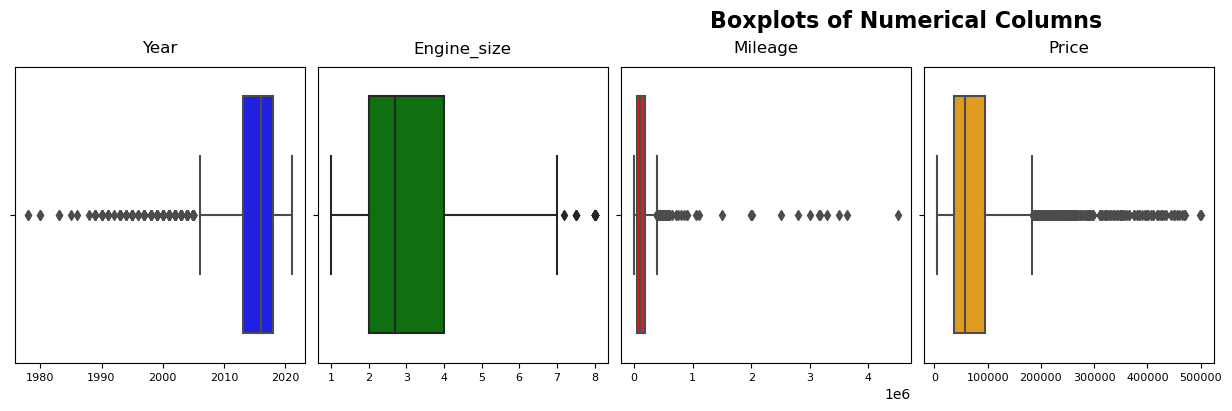

In [21]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 6)) 

# Create the subplots dynamically based on the number of plots
fig, axes = plt.subplots(n_rows, 6, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Define a list of colors for the boxplots
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Plot boxplots for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)  
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=12, pad=10)  
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  
    axes[i].tick_params(axis='both', labelsize=8)  


# Remove excess subplots
for j in range(n_plots, n_rows * 6):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Columns', fontsize=16, fontweight='bold')
plt.show()

In [22]:
display(df.describe(), df.describe(include=object))

Year  Engine_Size       Mileage          Price
count  3738.000000  3738.000000  3.738000e+03    3738.000000
mean   2014.829320     3.170706  1.390116e+05   78024.163456
std       4.949872     1.433337  2.016842e+05   67062.195246
min    1978.000000     1.000000  1.000000e+02    5000.000000
25%    2013.000000     2.000000  5.000000e+04   36000.000000
50%    2016.000000     2.700000  1.049000e+05   58000.000000
75%    2018.000000     4.000000  1.840000e+05   95000.000000
max    2021.000000     8.000000  4.500000e+06  500000.000000

Type  Region    Make  Gear_Type Origin Options
count           3738    3738    3738       3738   3738    3738
unique           317      27      56          2      4       3
top     Land Cruiser  Riyadh  Toyota  Automatic  Saudi    Full
freq             147    1589     874       3344   2824    1441

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3738 non-null   object 
 1   Region       3738 non-null   object 
 2   Make         3738 non-null   object 
 3   Gear_Type    3738 non-null   object 
 4   Origin       3738 non-null   object 
 5   Options      3738 non-null   object 
 6   Year         3738 non-null   int64  
 7   Engine_Size  3738 non-null   float64
 8   Mileage      3738 non-null   int64  
 9   Negotiable   3738 non-null   bool   
 10  Price        3738 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 324.9+ KB


In [24]:
df.drop(columns=['Negotiable'], inplace=True)

After carrying out the data cleaning process through various processes such as dropping duplicates, dropping data anomalies, handling outliers, and various other processes, the results were obtained:
There are 3738 entries remain from 5624 entries. The results of this data cleaning provide more stable data than before. This is done by eliminating unnecessary entries. 

>## Exploratory Data Analysis (EDA)

>## 1. Numerical Data

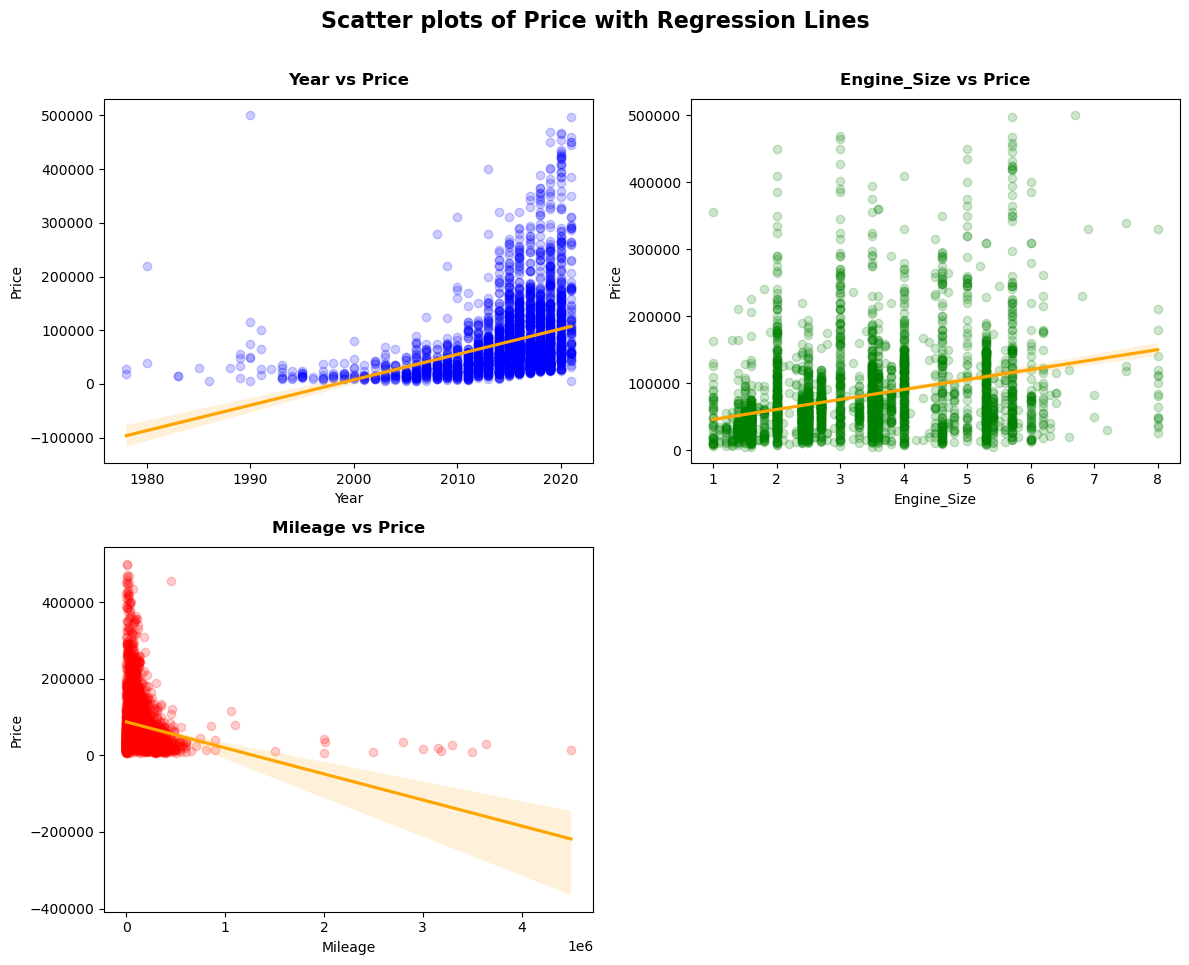

In [26]:
numeric_columns = ['Year', 'Engine_Size', 'Mileage', 'Price']
data = df[numeric_columns]
data = data.dropna()

# Create scatter plots with regression lines in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
scatter_colors = ['blue', 'green', 'red']

for i, (col, color) in enumerate(zip(numeric_columns[:-1], scatter_colors)):
    sns.regplot(data=data, y='Price', x=col, ax=axes[i//2, i%2], scatter_kws={'alpha': 0.2, 'color': color}, line_kws={'color': 'orange'})
    axes[i//2, i%2].set_title(f'{col} vs Price', pad=10, fontweight='bold', fontsize=12)
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Price')

# Remove the empty subplot in the last row and last column
fig.delaxes(axes[1, 1])

plt.suptitle('Scatter plots of Price with Regression Lines', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

Year  Engine_Size   Mileage     Price
Year         1.000000    -0.306264 -0.492843  0.465647
Engine_Size -0.306264     1.000000  0.162274  0.382538
Mileage     -0.492843     0.162274  1.000000 -0.307571
Price        0.465647     0.382538 -0.307571  1.000000

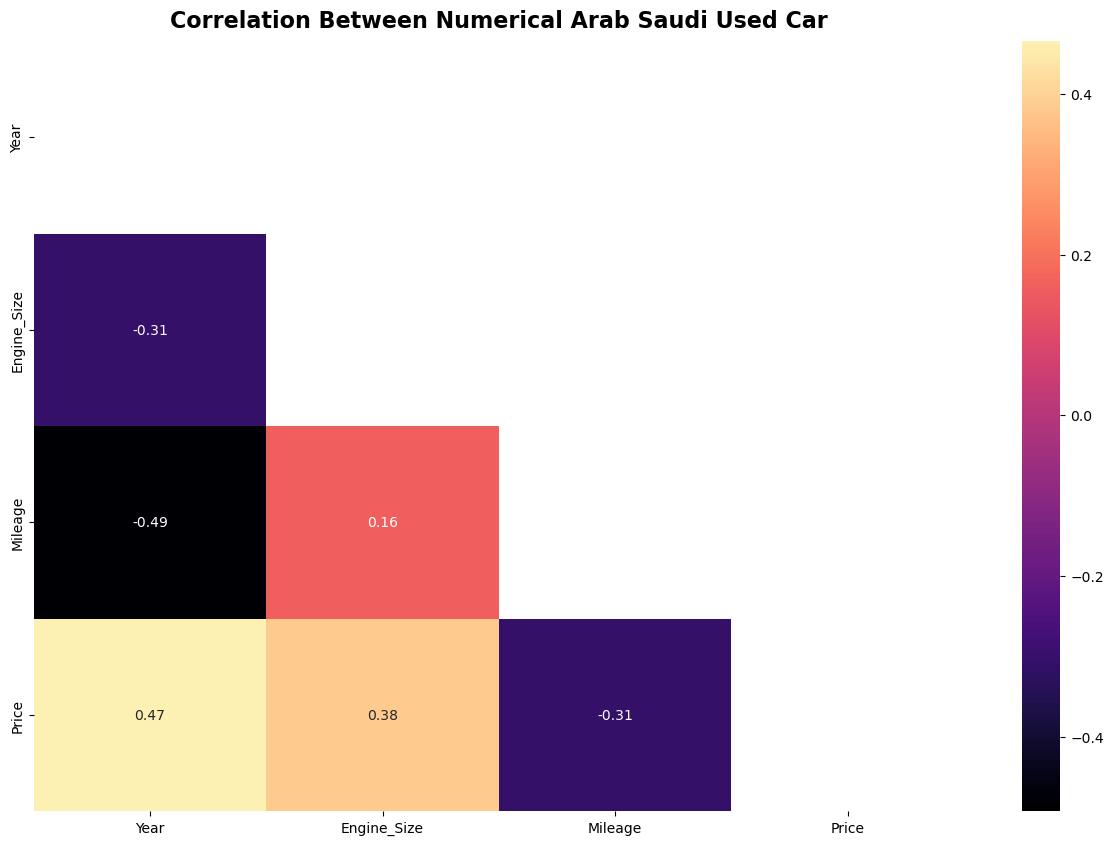

In [27]:
numerical_col = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (15, 10))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "magma",
    center = 0,
    mask = matriks
)

plt.title("Correlation Between Numerical Arab Saudi Used Car", size=16, pad=10, fontweight='bold')
plt.show()

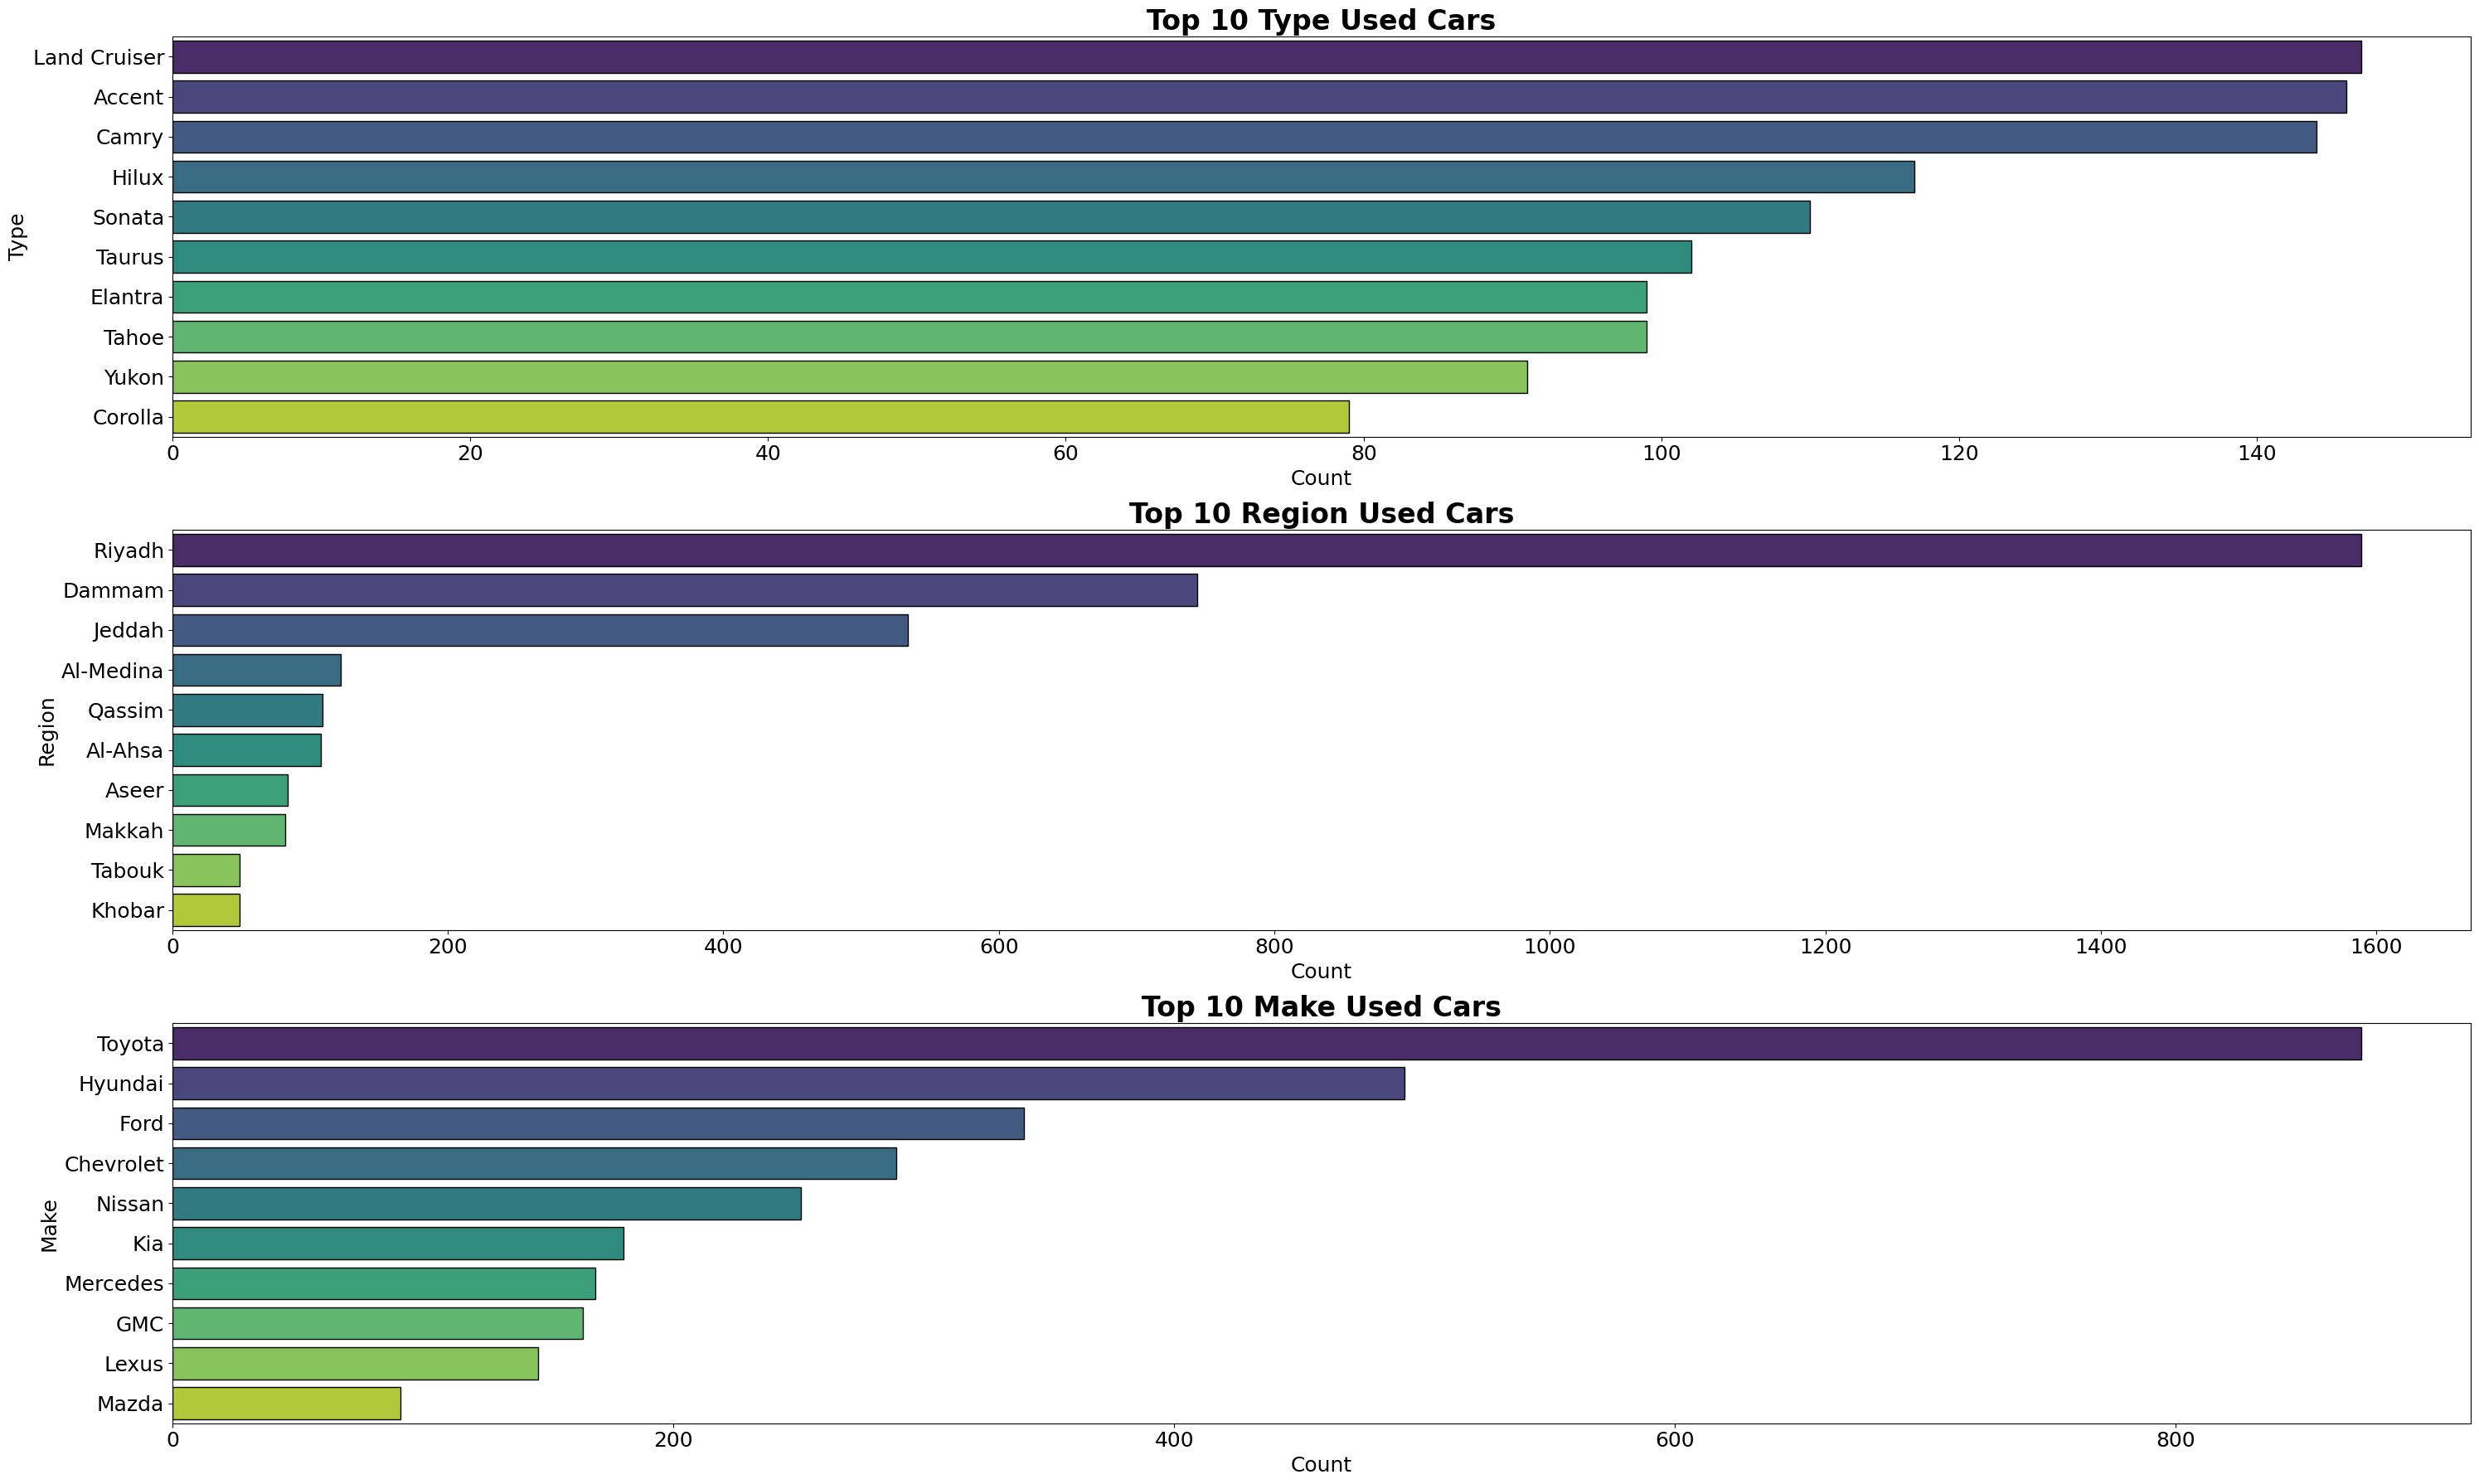

In [28]:
fig = plt.figure(figsize=(30, 18))

columns_to_plot = ['Type', 'Region', 'Make']  
count = 0

for column in columns_to_plot:
    count += 1
    ax = plt.subplot(3, 1, count)  
    sns.countplot(
        y=column, 
        data=df, 
        order=df[column].value_counts().sort_values(ascending=False).head(10).index, 
        palette='viridis', 
        edgecolor='black'
    )
    plt.title(f"Top 10 {column} Used Cars", fontweight='bold', fontsize=24)  
    plt.xlabel("Count", fontsize=18)  
    plt.ylabel(column, fontsize=18)  
    plt.xticks(fontsize=18)  
    plt.yticks(fontsize=18)  

plt.tight_layout()
plt.show()


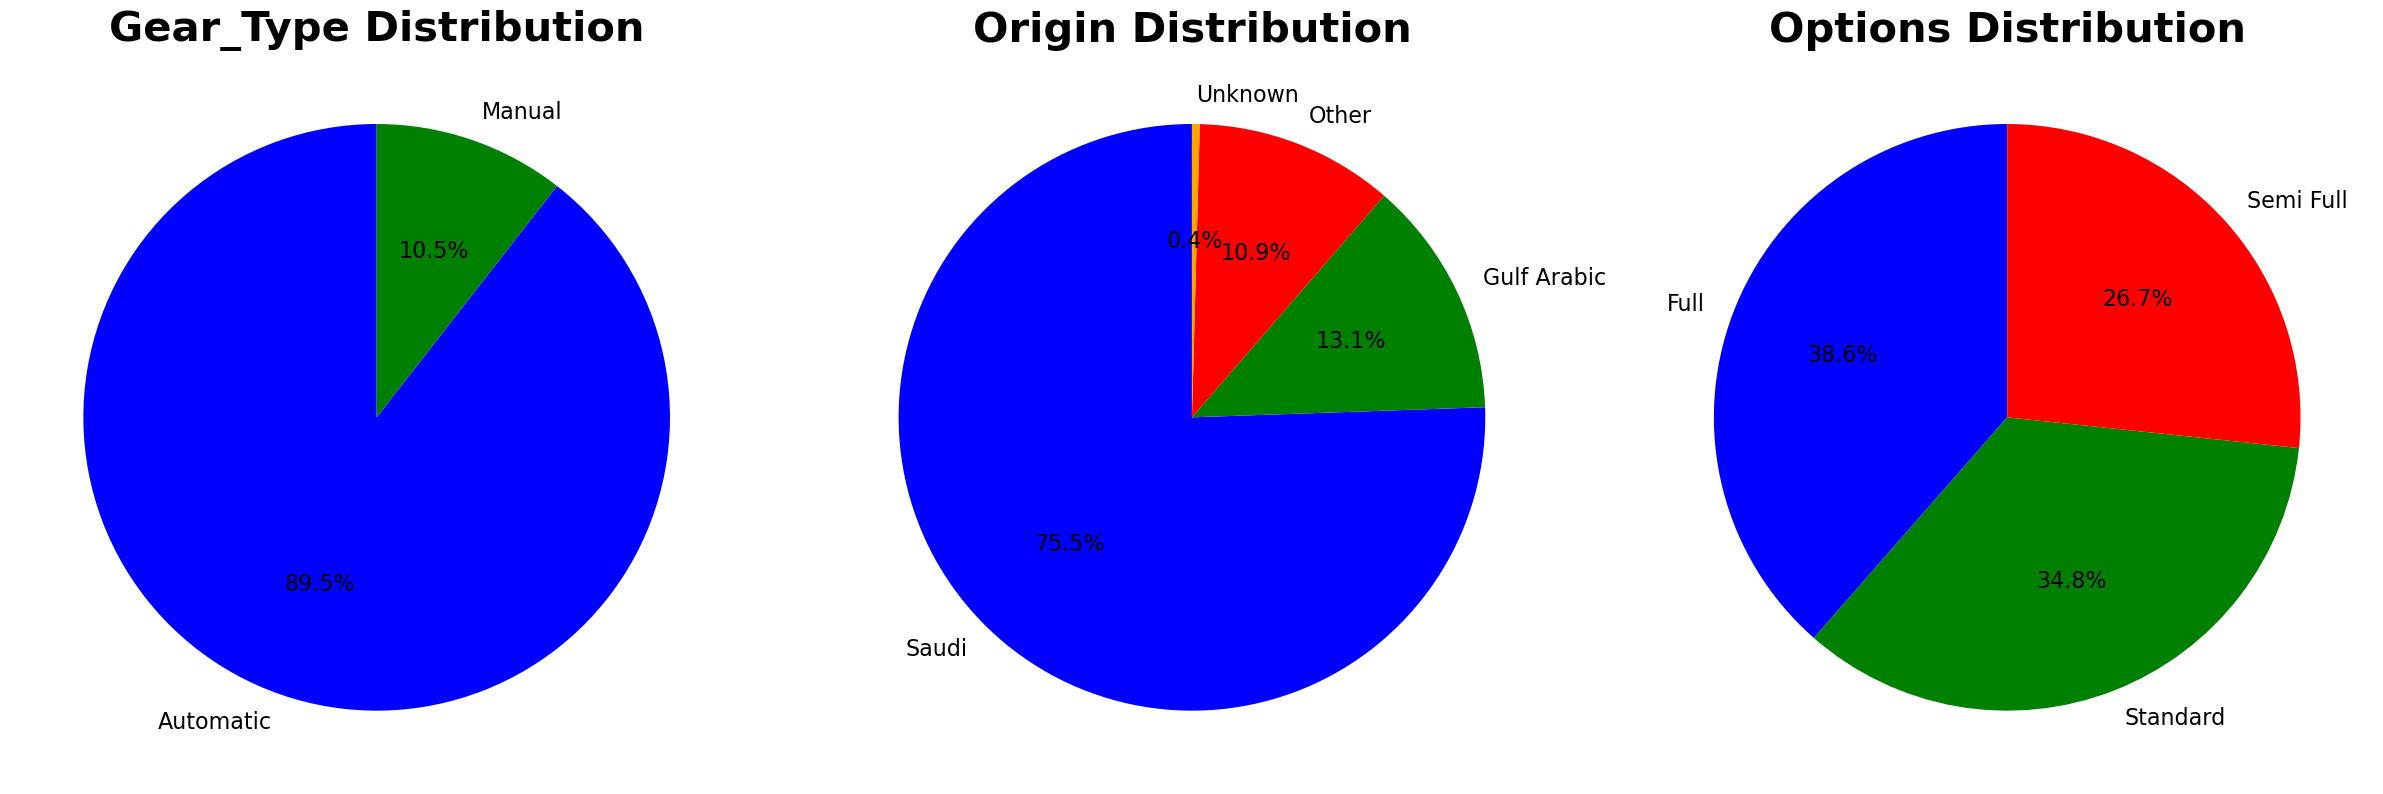

In [29]:
columns_to_plot = ['Gear_Type', 'Origin', 'Options']  
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    data = df[column].value_counts()  
    ax.pie(
        data, 
        labels=data.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        textprops={'fontsize': 16}
    )
    ax.set_title(f"{column} Distribution", fontweight='bold', fontsize=30)

plt.tight_layout()
plt.show()


In [30]:
# Define x and y
x = df.drop(columns=['Price'])
y = df['Price']

In [31]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

## C. PREPROCESSING

**ColumnTransformer to preprocess different subsets of columns in this dataset using various transformers.**

**1. One-Hot Encoding ('One Hot'):**
One-hot encoding is applied to categorical columns 'Gear_Type', 'Origin', and 'Options'. It creates binary columns for each category.

**2. Binary Encoding ('Binary'):**
Binary encoding is applied to categorical columns 'Type', 'Region', and 'Make'. It converts each category into binary representation, creating new columns for each digit.

**3. Robust Scaling ('robust scaler'):**
Robust scaling is applied to numeric columns 'Year', 'Engine_Size', and 'Mileage'. Robust scaling is useful when dealing with numerical features that may have outliers.

In [32]:
# Importing library for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

#Polynomial feature
from sklearn.preprocessing import PolynomialFeatures

from category_encoders import BinaryEncoder
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, get_scorer_names, mean_squared_log_error
from catboost import CatBoostRegressor

In [33]:
listdesc = []
for col in df.select_dtypes('object').columns:
    listdesc.append([col,
                     df[col].dtypes,
                     df[col].nunique(),
                     df[col].drop_duplicates().sample(1).values])

pd.DataFrame(listdesc, columns=['Data Features',
                               'Data Types',
                               'Unique',
                               'Unique Sample'])

Data Features Data Types  Unique Unique Sample
0          Type     object     317     [Safrane]
1        Region     object      27      [Jeddah]
2          Make     object      56         [GMC]
3     Gear_Type     object       2      [Manual]
4        Origin     object       4       [Saudi]
5       Options     object       3        [Full]

In [34]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Options', 'Origin', 'Gear_Type']),
    ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('Robust', RobustScaler(),['Year','Engine_Size', 'Mileage'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['Options', 'Origin', 'Gear_Type']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('Robust', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

In [35]:
transformed_train = pd.DataFrame(transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())
transformed_train.head()

One Hot__Options_Semi Full  One Hot__Options_Standard  \
0                         0.0                        1.0   
1                         1.0                        0.0   
2                         0.0                        0.0   
3                         1.0                        0.0   
4                         1.0                        0.0   

   One Hot__Origin_Other  One Hot__Origin_Saudi  One Hot__Origin_Unknown  \
0                    0.0                    1.0                      0.0   
1                    0.0                    1.0                      0.0   
2                    0.0                    1.0                      0.0   
3                    0.0                    1.0                      0.0   
4                    0.0                    1.0                      0.0   

   One Hot__Gear_Type_Manual  Binary__Type_0  Binary__Type_1  Binary__Type_2  \
0                        0.0             0.0             0.0             0.0   
1                        0.0             0.0             0.0             0.0   
2                        0.0             0.0             0.0             0.0   
3                        0.0             0.0             0.0             0.0   
4                        1.0             0.0             0.0             0.0   

   Binary__Type_3  Binary__Type_4  Binary__Type_5  Binary__Type_6  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             1.0   
4             0.0             0.0             0.0             1.0   

   Binary__Type_7  Binary__Type_8  Binary__Region_0  Binary__Region_1  \
0             0.0             1.0               0.0               0.0   
1             1.0             0.0               0.0               0.0   
2             1.0             1.0               0.0               0.0   
3             0.0             0.0               0.0               0.0   
4             0.0             1.0               0.0               0.0   

   Binary__Region_2  Binary__Region_3  Binary__Region_4  Binary__Make_0  \
0               0.0               0.0               1.0             0.0   
1               0.0               1.0               0.0             0.0   
2               0.0               1.0               1.0             0.0   
3               0.0               1.0               1.0             0.0   
4               1.0               0.0               0.0             0.0   

   Binary__Make_1  Binary__Make_2  Binary__Make_3  Binary__Make_4  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             1.0   
2             0.0             0.0             0.0             1.0   
3             0.0             0.0             0.0             1.0   
4             0.0             0.0             0.0             1.0   

   Binary__Make_5  Robust__Year  Robust__Engine_Size  Robust__Mileage  
0             1.0           0.4                -0.35         0.236641  
1             0.0          -0.6                 0.30        -0.666412  
2             0.0          -0.4                -0.55         2.335878  
3             0.0           0.0                -0.15         0.809160  
4             1.0          -0.6                 0.00        -0.791679

In [36]:
transformed_test = pd.DataFrame(transformer.transform(x_test), columns=transformer.get_feature_names_out())
transformed_test.head()

One Hot__Options_Semi Full  One Hot__Options_Standard  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        1.0   
3                         0.0                        0.0   
4                         0.0                        1.0   

   One Hot__Origin_Other  One Hot__Origin_Saudi  One Hot__Origin_Unknown  \
0                    0.0                    1.0                      0.0   
1                    0.0                    1.0                      0.0   
2                    0.0                    1.0                      0.0   
3                    1.0                    0.0                      0.0   
4                    0.0                    1.0                      0.0   

   One Hot__Gear_Type_Manual  Binary__Type_0  Binary__Type_1  Binary__Type_2  \
0                        0.0             0.0             0.0             0.0   
1                        0.0             0.0             0.0             0.0   
2                        0.0             0.0             0.0             1.0   
3                        0.0             0.0             0.0             0.0   
4                        0.0             0.0             0.0             0.0   

   Binary__Type_3  Binary__Type_4  Binary__Type_5  Binary__Type_6  \
0             0.0             1.0             1.0             0.0   
1             0.0             0.0             0.0             0.0   
2             1.0             1.0             1.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   Binary__Type_7  Binary__Type_8  Binary__Region_0  Binary__Region_1  \
0             0.0             1.0               0.0               0.0   
1             0.0             0.0               0.0               0.0   
2             1.0             0.0               0.0               0.0   
3             0.0             0.0               0.0               0.0   
4             0.0             1.0               0.0               0.0   

   Binary__Region_2  Binary__Region_3  Binary__Region_4  Binary__Make_0  \
0               0.0               1.0               1.0             0.0   
1               1.0               0.0               1.0             1.0   
2               0.0               1.0               1.0             0.0   
3               1.0               0.0               1.0             0.0   
4               1.0               0.0               1.0             0.0   

   Binary__Make_1  Binary__Make_2  Binary__Make_3  Binary__Make_4  \
0             0.0             0.0             0.0             1.0   
1             0.0             1.0             1.0             1.0   
2             0.0             0.0             1.0             1.0   
3             0.0             1.0             0.0             1.0   
4             0.0             0.0             0.0             1.0   

   Binary__Make_5  Robust__Year  Robust__Engine_Size  Robust__Mileage  
0             1.0           0.2                 0.00         1.007634  
1             0.0          -1.2                 1.65        -0.251908  
2             0.0          -0.4                 0.55         1.160305  
3             1.0           0.6                -0.35        -0.679389  
4             1.0          -0.4                -0.15         0.603053

>## Multicollinearity Test

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [38]:
# untuk menampilkan nilai VIF masing-masing feature
def calc_vif(X):
    vif = pd.DataFrame()
    
    vif['feature'] =  X.columns
    vif['VIF'] =[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif['acceptance'] = np.where(vif.VIF < 4, 'Yes', 'No')
    
    return vif

In [39]:
calc_vif(transformed_train)

feature       VIF acceptance
0   One Hot__Options_Semi Full  1.731759        Yes
1    One Hot__Options_Standard  2.293321        Yes
2        One Hot__Origin_Other  1.748025        Yes
3        One Hot__Origin_Saudi  5.901450         No
4      One Hot__Origin_Unknown  1.042768        Yes
5    One Hot__Gear_Type_Manual  1.360422        Yes
6               Binary__Type_0  1.145109        Yes
7               Binary__Type_1  1.426832        Yes
8               Binary__Type_2  1.593412        Yes
9               Binary__Type_3  1.986140        Yes
10              Binary__Type_4  2.082027        Yes
11              Binary__Type_5  2.155560        Yes
12              Binary__Type_6  2.115771        Yes
13              Binary__Type_7  1.940179        Yes
14              Binary__Type_8  2.262666        Yes
15            Binary__Region_0  1.109925        Yes
16            Binary__Region_1  1.181981        Yes
17            Binary__Region_2  2.283856        Yes
18            Binary__Region_3  4.920637         No
19            Binary__Region_4  3.820668        Yes
20              Binary__Make_0  1.334791        Yes
21              Binary__Make_1  1.550835        Yes
22              Binary__Make_2  1.726775        Yes
23              Binary__Make_3  2.109312        Yes
24              Binary__Make_4  3.015125        Yes
25              Binary__Make_5  3.021702        Yes
26                Robust__Year  1.397589        Yes
27         Robust__Engine_Size  1.659872        Yes
28             Robust__Mileage  1.156808        Yes

## D. MODELING

**The best model predicting the price of used cars in Saudi Arabia is Regression models. List of models candidate:**

- Linear Regression: It can shows the relationship between the price of used cars (dependent variable) and the features (independent variables) assuming a linear relationship. 

- K-Nearest Neighbors Regression: It can predicts the target variable by averaging the values of its k-nearest neighbors. 

- Decision Tree Regression: It can partition the data into subsets based on features and predict the target variable for each subset. 

- Random Forest Regression: An ensemble of Decision Trees. It builds multiple trees and combines their predictions to improve accuracy and reduce overfitting. It's robust and can handle a variety of data types.

- Gradient Boosting Regression: Builds an ensemble of weak learners (usually decision trees) sequentially, with each tree correcting the errors of the previous one. It's powerful and can capture complex relationships in the data.

- XGBoost Regression: An efficient and scalable implementation of Gradient Boosting. It includes regularization terms and is known for its high performance. It often performs well in various types of datasets.

- Ridge Regression: A linear regression model with regularization. It adds a penalty term to the linear regression objective function, which can be useful if there is multicollinearity among features.

- Lasso Regression: A linear regression model with regularization. It adds a penalty term and has a tendency to produce sparse models by setting some coefficients to zero. It can be helpful for feature selection.

- Elastic Net: Combination of Ridge and Lasso regression. It combines both L1 and L2 regularization terms. It is useful when there are many correlated features in the dataset.

- AdaBoost Regression:Combines multiple weak learners (typically shallow decision trees) to create a strong learner. It sequentially focuses on the mistakes made by the previous models, improving overall accuracy.

- CatBoost Regression:A gradient boosting library designed for categorical features. It handles categorical variables efficiently and performs well in many scenarios without the need for extensive preprocessing.

In [40]:
# Define algoritm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
Ada_Boost = AdaBoostRegressor()
cat = CatBoostRegressor(random_state=42, verbose=False)
gdt = GradientBoostingRegressor(random_state=42)

ttr_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
ttr_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
ttr_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
ttr_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
ttr_gdt = TransformedTargetRegressor(gdt, func = np.log, inverse_func = np.exp)
ttr_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)
ttr_ridge = TransformedTargetRegressor(ridge, func = np.log, inverse_func = np.exp)
ttr_lasso = TransformedTargetRegressor(lasso, func = np.log, inverse_func = np.exp)
ttr_enet = TransformedTargetRegressor(elastic_net, func = np.log, inverse_func = np.exp)
ttr_Ada_Boost = TransformedTargetRegressor(Ada_Boost, func = np.log, inverse_func = np.exp)
ttr_cat = TransformedTargetRegressor(cat, func = np.log, inverse_func = np.exp)


# Algoritm candidate
models = [ttr_lr, ttr_knn, ttr_dt, ttr_rf, ttr_gdt, ttr_xgb,  ttr_ridge, ttr_lasso, ttr_enet, ttr_Ada_Boost, ttr_cat]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Looking for the best algoritm based on the metrics
for i in models:

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    
    # R-squared
    model_cv_r2 = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=5,
        scoring='r2',  
        error_score='raise'
    )

    print(model_cv_r2, i)
    
    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-40911.97813761 -42175.43157751 -41061.76153101 -50314.02560462
 -41746.24786106] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-24992.54812367 -23993.83283708 -22244.4503224  -26204.99730182
 -23732.1161562 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.61066906 0.59485443 0.53908254 0.57435754 0.56239145] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-30531.85187025 -31442.72659247 -32476.0887925  -39275.48304495
 -30982.60763179] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-17808.6639247  -18396.09214997 -17182.62011539 -20333.53876493
 -18158.42994959] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
     

[-40913.91345089 -42188.90683142 -41078.64422933 -50370.13388521
 -41728.16232939] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-24997.32925045 -24000.72807298 -22246.04190838 -26222.51067237
 -23710.09872936] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[0.61063222 0.5945955  0.53870344 0.57340769 0.56277053] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-68433.78016955 -69056.93982415 -62089.62393257 -81821.59981723
 -64961.77833697] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-42084.15839695 -42838.50482033 -37751.70165474 -48604.93846569
 -39709.12181506] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-0.08

## E. EVALUATION 

In [41]:
# Evaluation of algorithm candidate
train_score = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boost Regression','Extreme Gradient Boost', 'Ridge', 'Lasso', 'Elastic-Net', 'AdaBoostRegressor', 'CatBoostRegressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2
})

train_score

Model     Mean_RMSE     Std_RMSE      Mean_MAE  \
0           Linear Regression -43241.888942  3565.692932 -24233.588948   
1              KNN Regression -32941.751586  3231.901410 -18375.868981   
2    Decision Tree Regression -44781.915998  3738.343732 -23282.010090   
3    Random Forest Regression -30151.168639  2178.410009 -15637.092139   
4   Gradient Boost Regression -32511.378973  2695.414131 -17620.302694   
5      Extreme Gradient Boost -27675.159554  2079.626296 -14984.983493   
6                       Ridge -43255.952145  3586.366525 -24235.341727   
7                       Lasso -69272.744416  6758.784697 -42197.685031   
8                 Elastic-Net -69272.744416  6758.784697 -42197.685031   
9           AdaBoostRegressor -43887.305855  3953.364568 -26207.671426   
10          CatBoostRegressor -24395.472929  2397.394754 -12730.128550   

        Std_MAE   Mean_R2    Std_R2  
0   1321.219161  0.576271  0.024931  
1   1060.728441  0.753853  0.025606  
2   1753.557903  0.537946  0.089371  
3    540.578925  0.790020  0.044555  
4    661.600447  0.757080  0.046037  
5    500.078123  0.822270  0.040769  
6   1327.983655  0.576022  0.024972  
7   3672.496424 -0.082940  0.025544  
8   3672.496424 -0.082940  0.025544  
9   1657.956107  0.566542  0.029170  
10   452.967855  0.861248  0.039214

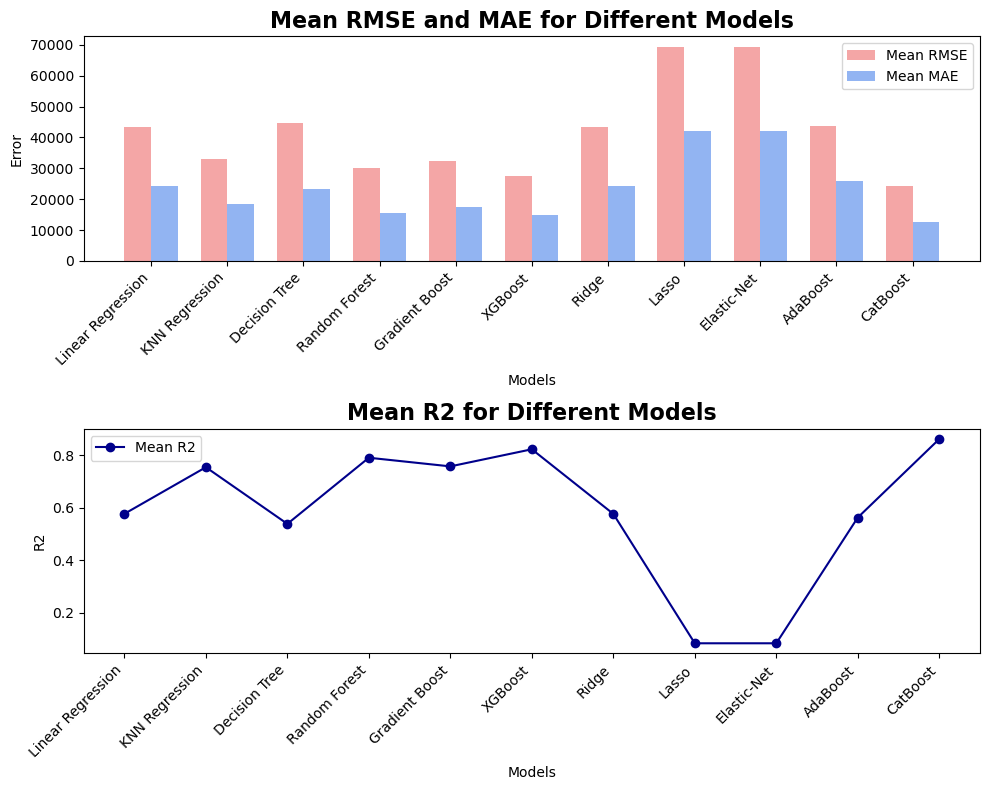

In [42]:
models = ['Linear Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XGBoost',
          'Ridge', 'Lasso', 'Elastic-Net', 'AdaBoost', 'CatBoost']
mean_rmse = [43241.888942, 32941.751586, 44781.915998, 30151.168639, 32511.378973, 27675.159554, 43255.952145, 69272.744416, 69272.744416, 43781.455404, 24395.472929]
mean_mae = [24233.58895, 18375.86898, 23282.01009, 15637.09214, 17620.30269, 14984.98349, 24235.34173, 42197.68503, 42197.68503, 25834.31657, 12730.12855]
mean_r2 = [0.576271, 0.753853, 0.537946, 0.79002, 0.75708, 0.82227, 0.576022, 0.08294, 0.08294, 0.562061, 0.861248]

# Bar Plot for Mean RMSE and MAE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

bar_width = 0.35
index = np.arange(len(models))

rects1 = ax1.bar(index, mean_rmse, bar_width, label='Mean RMSE', color='lightcoral', alpha=0.7)
rects2 = ax1.bar(index + bar_width, mean_mae, bar_width, label='Mean MAE', color='cornflowerblue', alpha=0.7)

ax1.set_xlabel('Models')
ax1.set_ylabel('Error')
ax1.set_title('Mean RMSE and MAE for Different Models', fontsize=16, fontweight='bold')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()

# Line Plot for R2
ax2.plot(models, mean_r2, marker='o', linestyle='-', color='darkblue', label='Mean R2')
ax2.set_xlabel('Models')
ax2.set_ylabel('R2')
ax2.set_title('Mean R2 for Different Models', fontsize=16, fontweight='bold')
ax2.set_xticks(index)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()

plt.tight_layout()
plt.show()

In [43]:
# Benchmark top 3 models
models = {
    'cat': CatBoostRegressor(random_state=42, verbose=False),
    'rf': RandomForestRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_r2 =[]

# Prediction on test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))


# Creating the DataFrame
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'R2': score_r2}, index=models.keys())

score_before_tuning

RMSE           MAE        R2
cat  27892.781517  13852.533026  0.829038
rf   30978.213302  16000.126563  0.789123
xgb  29846.026903  15390.695058  0.804255

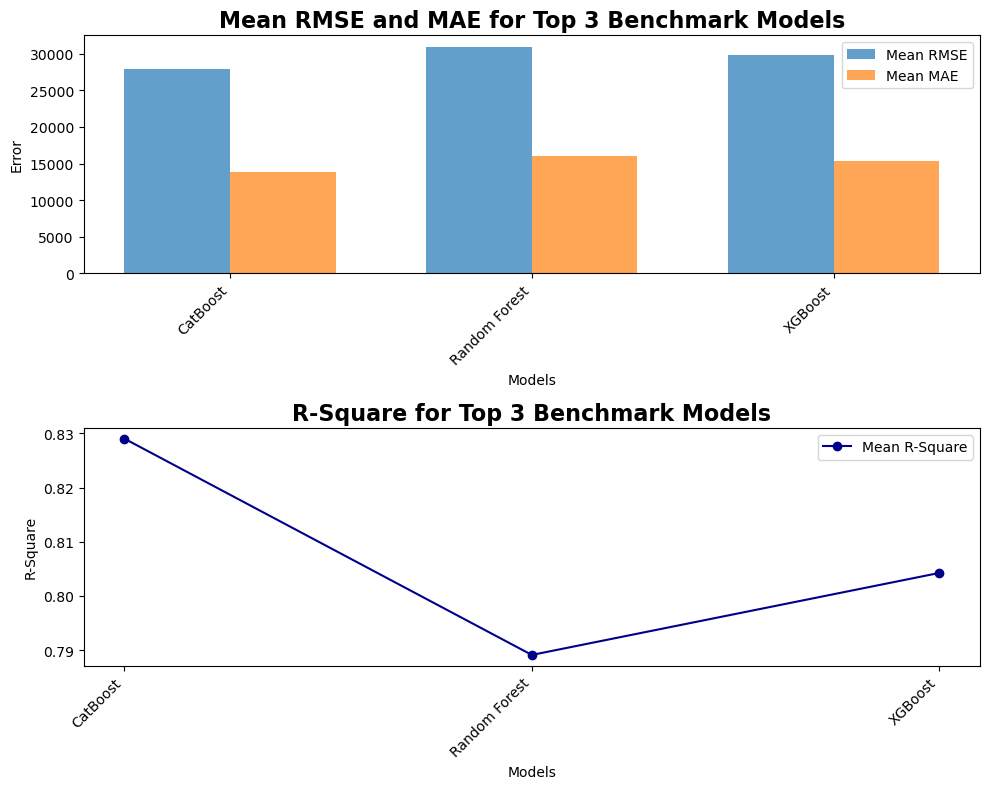

In [44]:
models = ['CatBoost', 'Random Forest', 'XGBoost']
mean_rmse = [27892.78152, 30978.2133, 29846.0269]
mean_mae = [13852.53303, 16000.12656, 15390.69506]
mean_r2 = [0.829038, 0.789123, 0.804255]

# Bar Plot for Mean RMSE and MAE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

bar_width = 0.35
index = np.arange(len(models))

rects1 = ax1.bar(index, mean_rmse, bar_width, label='Mean RMSE', alpha=0.7)
rects2 = ax1.bar(index + bar_width, mean_mae, bar_width, label='Mean MAE', alpha=0.7)

ax1.set_xlabel('Models')
ax1.set_ylabel('Error')
ax1.set_title('Mean RMSE and MAE for Top 3 Benchmark Models', fontsize=16, fontweight='bold')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()

# Line Plot for R-Square
ax2.plot(models, mean_r2, marker='o', linestyle='-', color='darkblue', label='Mean R-Square')
ax2.set_xlabel('Models')
ax2.set_ylabel('R-Square')
ax2.set_title('R-Square for Top 3 Benchmark Models', fontsize=16, fontweight='bold')
ax2.set_xticks(index)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()

plt.tight_layout()
plt.show()

In [45]:
# Benchmark for the best model
models = {
    'cat': CatBoostRegressor(random_state=42, verbose=False)
}

score_rmse = []
score_mae = []
score_r2 = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))
    

# Use a list of tuples for creating the DataFrame
score_before_tuning = pd.DataFrame({
    'Score MAE': score_mae,
    'Score RMSE': score_rmse,
    'Score R2': score_r2
}, index=['Cat Boost Before Tuning'])

score_before_tuning

Score MAE    Score RMSE  Score R2
Cat Boost Before Tuning  13852.533026  27892.781517  0.829038

**Choosing the CatBoostRegressor model based on its lower scores for Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Square Error (RMSE)**

1. Mean Absolute Error (MAE):  CatBoostRegressor model has an MAE score 13852.53303, which is lower than the other models that are compared and considered. A lower MAE score indicates that the model’s predictions are closer to the actual values (on average).

2. Root Mean Square Error (RMSE): CatBoostRegressor model has an RMSE score 27892.78152, which is lower than the other models. A smaller RMSE value indicates a higher level of accuracy.

3. R-Squared (R2):  CatBoostRegressor model has an R2 score 0.829038, which is lower than the other models that are compared and considered. The R-Squared value ranges from 0-1. The higher the R-Squared value, the higher the level of accuracy

**In summary, lower MAE, lower RMSE, and higher R2 indicates that the CatBoostRegressor model appears to have the best overall predictive accuracy among the models that have been considered. This suggests that it can provide the most accurate predictions for the price of used cars in Saudi Arabia.**

>## CatBoost Train & CatBoost Test

In [46]:
# Define models
models = {
    'cat': CatBoostRegressor(random_state=42, verbose=False)
}

score_rmse_train = []
score_mae_train = []
score_r2_train = []

score_rmse_test = []
score_mae_test = []
score_r2_test = []

# Training and test set prediction
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on training set
    y_pred_train = model.predict(x_train)
    score_rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    score_mae_train.append(mean_absolute_error(y_train, y_pred_train))
    score_r2_train.append(r2_score(y_train, y_pred_train))
    
    # Predict on test set
    y_pred_test = model.predict(x_test)
    score_rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    score_mae_test.append(mean_absolute_error(y_test, y_pred_test))
    score_r2_test.append(r2_score(y_train, y_pred_train))

# Use a MultiIndex for creating the DataFrame
score_df = pd.DataFrame({
    'MAE': [score_mae_train[0], score_mae_test[0]],
    'RMSE': [score_rmse_train[0], score_rmse_test[0]],
    'R2': [score_r2_train[0], score_r2_test[0]]
}, index=pd.MultiIndex.from_product([['Cat Boost'], ['Train', 'Test']], names=['Model', 'Set']))

score_df

MAE          RMSE        R2
Model     Set                                        
Cat Boost Train   6953.830008  10340.404975  0.976094
          Test   13852.533026  27892.781517  0.976094

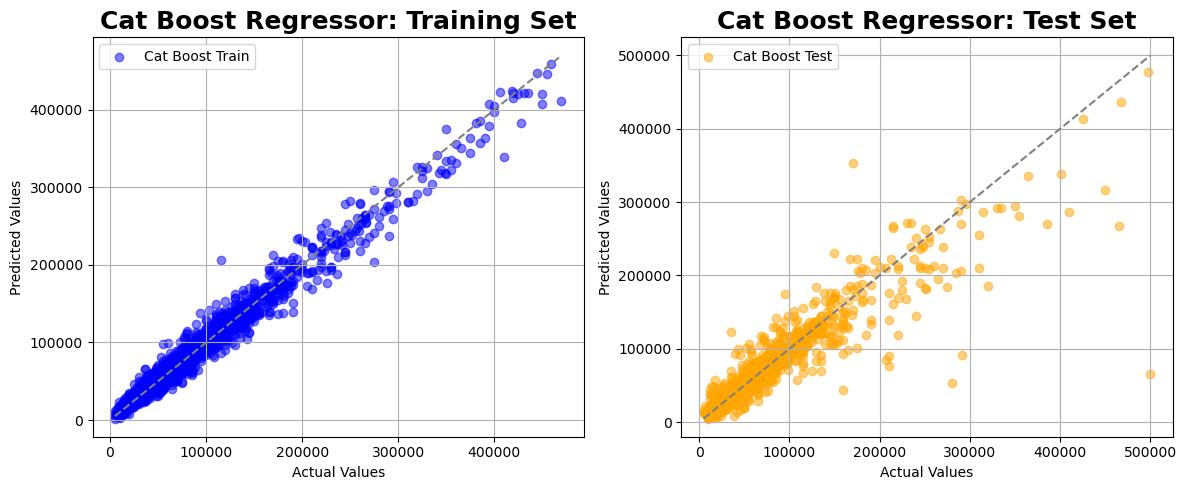

In [47]:
# Function to plot scatter plot with line of best fit
def scatter_with_line(ax, actual, predicted, label, color):
    ax.scatter(actual, predicted, alpha=0.5, label=label, color=color)
    ax.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray')  # Line of best fit
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for training set (blue)
scatter_with_line(ax1, y_train, y_pred_train, 'Cat Boost Train', color='blue')
ax1.set_title('Cat Boost Regressor: Training Set', fontweight='bold', fontsize=18)

# Scatter plot for test set (orange)
scatter_with_line(ax2, y_test, y_pred_test, 'Cat Boost Test', color='orange')
ax2.set_title('Cat Boost Regressor: Test Set',fontweight='bold', fontsize=18 )

plt.tight_layout()
plt.show()

# Hyperparameter CatBoost

In [48]:
hyperparam_space_catboost = {
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [100, 200],
    'model__l2_leaf_reg': [1, 3],
    'model__border_count': [32, 64],
    'model__early_stopping_rounds': [10, 20]
}

In [49]:
catboost = CatBoostRegressor(random_state=42, verbose=False)

crossval = KFold(n_splits=3, shuffle=True, random_state=42)

estimator_catboost = Pipeline([
    ('preprocessing', transformer),
    ('model', catboost)
])

rs = RandomizedSearchCV(
    estimator_catboost,
    param_distributions=hyperparam_space_catboost,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    refit='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter= 50,
    error_score='raise',
    random_state=42  
)

In [50]:
# Fit the RandomizedSearchCV
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Options',
                                                                                'Origin',
                                                                                'Gear_Type']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make']),
                                                                              ('Robust',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'En...
                                              <catboost.core.CatBoostRegressor object at 0x00000230DFA96A90>)]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__border_count': [32, 64],
                                        'model__depth': [4, 6, 8],
                                        'model__early_stopping_rounds': [10,
                                                                         20],
                                        'model__iterations': [100, 200],
                                        'model__l2_leaf_reg': [1, 3],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error', 'r2'])

In [51]:
# Assuming we have the best_score and best_params variables
best_score = rs.best_score_
best_params = rs.best_params_

# Create a DataFrame
result_df = pd.DataFrame({
    'Metric': ['Best Score', 'Best Params'],
    'Value': [best_score, str(best_params)]
})

# Display the DataFrame
result_df

Metric  \
0   Best Score   
1  Best Params   

                                                                                                                                                                Value  
0                                                                                                                                                       -14177.055983  
1  {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 1, 'model__iterations': 200, 'model__early_stopping_rounds': 10, 'model__depth': 8, 'model__border_count': 32}

In [52]:
model = {'CatBoost': CatBoostRegressor(random_state=42)}

cat_tuning = rs.best_estimator_

cat_tuning.fit(x_train, y_train)

y_pred_cat_tuning = cat_tuning.predict(x_test)

mae_cat_tuning = mean_absolute_error(y_test, y_pred_cat_tuning)
rmse_cat_tuning = np.sqrt(mean_squared_error(y_test, y_pred_cat_tuning))
r2_cat_tuning = r2_score(y_test, y_pred_cat_tuning)

score_after_tuning = pd.DataFramescore_after_tuning = pd.DataFrame({
    'Score MAE': [mae_cat_tuning],
    'Score RMSE': [rmse_cat_tuning],
    'Score R2': [r2_cat_tuning]
}, index=["Cat Boost After Tuning"])

score_after_tuning

Score MAE    Score RMSE  Score R2
Cat Boost After Tuning  13445.62197  27653.812494  0.831955

In [53]:
# Concatenate horizontally
result_df = pd.concat([score_before_tuning, score_after_tuning], axis=0)

# Print the resulting DataFrame
result_df

Score MAE    Score RMSE  Score R2
Cat Boost Before Tuning  13852.533026  27892.781517  0.829038
Cat Boost After Tuning   13445.621970  27653.812494  0.831955

In [54]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    """MAPE calculation."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_cat_tuning = calculate_mape(y_test, y_pred_cat_tuning)

score_after_tuning = pd.DataFrame({
    'Score MAPE': [mape_cat_tuning]
}, index=["Cat Boost After Tuning"])

print(score_after_tuning)

                        Score MAPE
Cat Boost After Tuning   21.226297


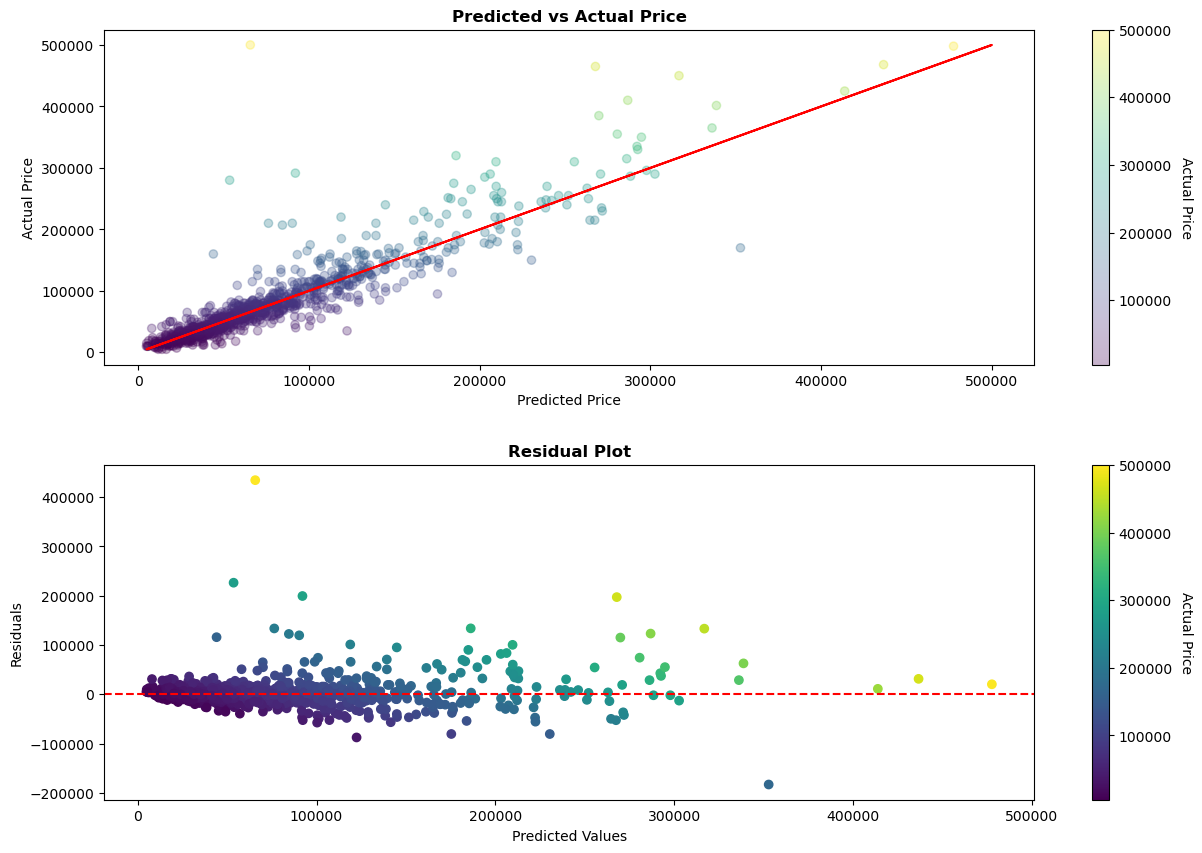

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
scatter_plot = ax1.scatter(y_pred, y_test, alpha=0.3, c=y_test, cmap='viridis')  
ax1.plot(y_test, y_test, color='red', alpha=1)
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Add colorbar to the scatter plot
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Actual Price', rotation=270, labelpad=15)

# Plot residual plot
diff = y_test - y_pred
scatter_residual = ax2.scatter(y_pred, diff, c=y_test, cmap='viridis') 
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

# Add colorbar to the residual scatter plot
cbar_residual = plt.colorbar(scatter_residual)
cbar_residual.set_label('Actual Price', rotation=270, labelpad=15)

plt.subplots_adjust(hspace=0.3)
plt.show()

**In the context of predicting the price of used cars in Saudi Arabia, “actual vs predicted price” refers to the comparison between the real market value (actual price) and the estimated value generated by a predictive model (predicted price).**

The first plot shows that as predicted prices increase, actual prices also tend to increase. However, there are deviations; some cars have higher actual prices than predicted and vice versa.

**A residual plot is a graph that shows the residuals (the differences between actual and predicted values) on the vertical axis and the independent variable (in this case, the predicted values) on the horizontal axis.** 

The second plot shows that most residuals are clustered around zero but spread out as we move further right along predicted values. This indicates that for lower-priced cars, predictions are relatively accurate but become increasingly volatile for higher-priced vehicles.

># Comparison of y_Actual, y_pred_final, error

In [56]:
df_error = pd.DataFrame({
    'y_actual' : y_test,
    'y_pred_final' : y_pred_cat_tuning 
})

df_error['error'] = df_error['y_actual'] - df_error['y_pred_final']

df_error.head()

y_actual   y_pred_final         error
1733     75000   72226.926944   2773.073056
812     180000  157447.531121  22552.468879
544      30000   38720.127596  -8720.127596
1671    175000  207794.026036 -32794.026036
2479     34000   41988.701143  -7988.701143

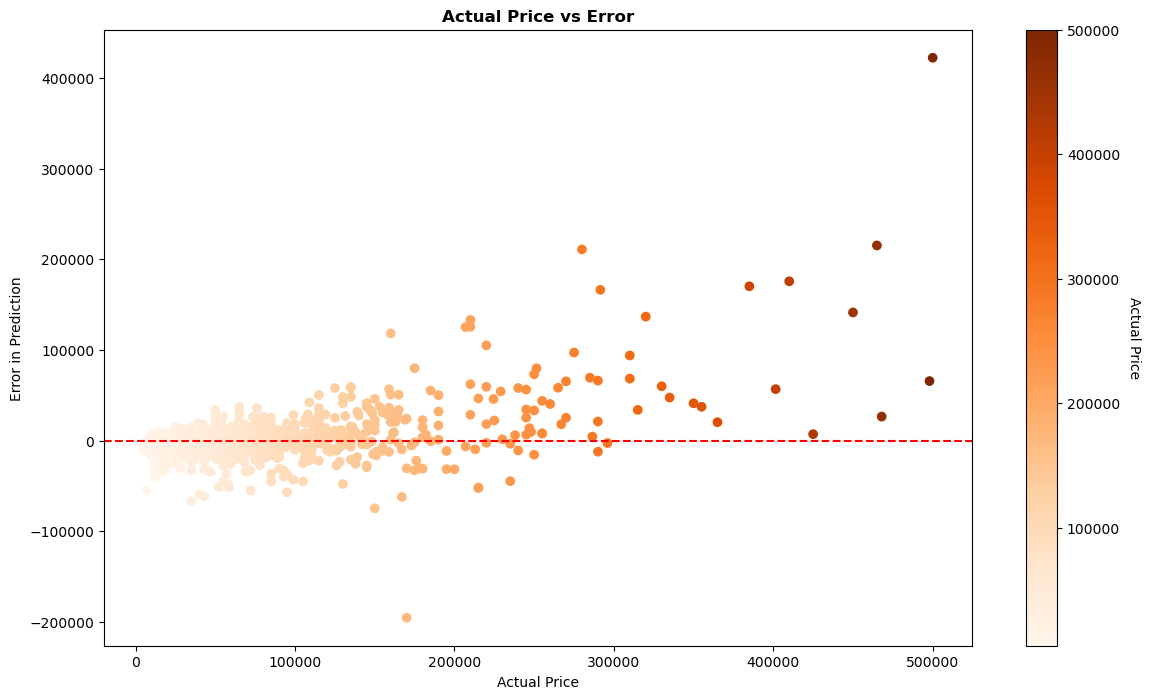

In [57]:
plt.figure(figsize=(14, 8))

# Scatter plot with color (changed cmap to 'Oranges')
plot = plt.scatter(x=df_error['y_actual'], y=df_error['error'], c=df_error['y_actual'], cmap='Oranges')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Set title with bold font
plt.title('Actual Price vs Error', fontweight='bold')

# Set labels
plt.xlabel('Actual Price')
plt.ylabel('Error in Prediction')

# Show colorbar
cbar = plt.colorbar(plot, orientation='vertical')
cbar.set_label('Actual Price', rotation=270, labelpad=15)

plt.show()

># Feature Importances

In [58]:
cat_tuning['model'].feature_importances_

array([1.07900668e+00, 1.72085363e+00, 2.42107102e-01, 5.34541995e-01,
       2.55741600e-03, 8.45974437e-02, 5.32283153e-02, 6.52419201e-01,
       7.38421314e-01, 2.95772366e+00, 1.89572100e+00, 1.89284065e+00,
       1.19493708e+00, 2.29153368e+00, 2.67104899e+00, 2.57184259e-02,
       1.30200273e-01, 2.92407681e-01, 2.71819824e-01, 2.58455523e-01,
       9.27760637e-01, 2.40771331e+00, 1.85215612e+01, 5.70884784e+00,
       4.78207426e+00, 4.37810673e+00, 2.17143112e+01, 1.82448150e+01,
       4.32466988e+00])

In [59]:
# Plot feature importances
feature_imp = pd.DataFrame(cat_tuning['model'].feature_importances_, transformer.get_feature_names_out()).reset_index().rename(columns={'index' : 'Feature', 0 : 'Importance'})
Top15_feature = feature_imp.sort_values('Importance',ascending=False).head(15)
Top15_feature

Feature  Importance
26               Robust__Year   21.714311
22             Binary__Make_2   18.521561
27        Robust__Engine_Size   18.244815
23             Binary__Make_3    5.708848
24             Binary__Make_4    4.782074
25             Binary__Make_5    4.378107
28            Robust__Mileage    4.324670
9              Binary__Type_3    2.957724
14             Binary__Type_8    2.671049
21             Binary__Make_1    2.407713
13             Binary__Type_7    2.291534
10             Binary__Type_4    1.895721
11             Binary__Type_5    1.892841
1   One Hot__Options_Standard    1.720854
12             Binary__Type_6    1.194937

float64


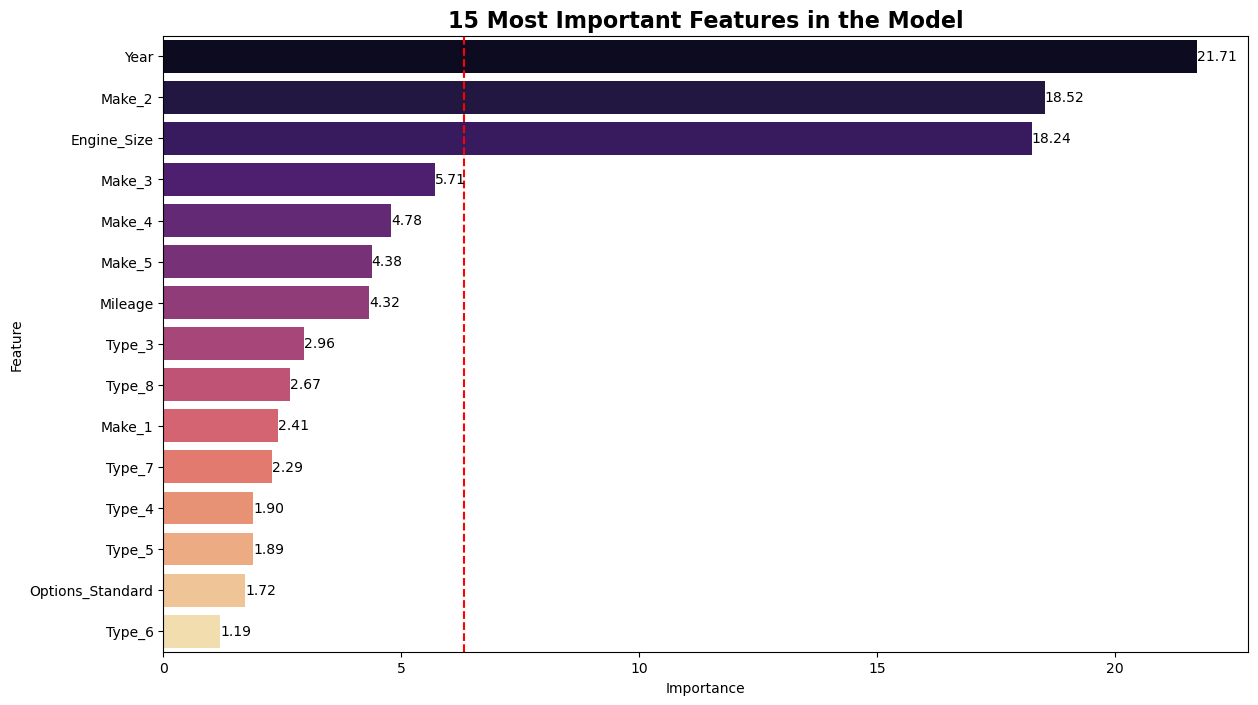

In [60]:
# Remove prefixes from the 'Feature' column
Top15_feature['Feature'] = Top15_feature['Feature'].str.replace('Binary__', '').str.replace('One Hot__', '').str.replace('Robust__', '')

# Check the data type of the 'Importance' column
print(Top15_feature['Importance'].dtype)

# Convert 'Importance' column to numeric
Top15_feature['Importance'] = pd.to_numeric(Top15_feature['Importance'], errors='coerce')

# Calculate mean importance
mean_imp = Top15_feature['Importance'].mean()

# Set a custom color palette
custom_palette = sns.color_palette("magma", n_colors=len(Top15_feature))

# Increase the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot with custom colors
bar_plot = sns.barplot(data=Top15_feature, x='Importance', y='Feature', palette=custom_palette)

# Add annotations
for index, value in enumerate(Top15_feature['Importance']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Add title
plt.title('15 Most Important Features in the Model', fontsize=16, fontweight='bold')

# Plot mean importance
plt.axvline(x=mean_imp, color='red', linestyle='--', label='Mean Importance')

# Show the plot
plt.show()

># Save Model 

In [61]:
import pickle

In [62]:
# best model
cat_tuning = rs.best_estimator_
cat_tuning

# fit
cat_tuning.fit(x, y)

# save with pickle
pickle.dump(cat_tuning, open('model.pkl', 'wb'))

In [63]:
# load model

model_loaded = pickle.load(open('model.pkl', 'rb'))
model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Options', 'Origin',
                                                   'Gear_Type']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('Robust', RobustScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x00000230DDF165D0>)])

# F. Conclusion & Recommendation

# Conclusion

Used car buying and selling platforms have the challenge of determining accurate prices to ensure competitiveness and profitability. Therefore, the use of machine learning models can provide insights based on the results of objective data processing about price dynamics taken into account with various features. Through careful analysis and evaluation of metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), R-Square, and Mean Absolute Percentage Error (MAPE), the model offers actionable recommendations to optimize pricing strategies and improve user experience on the platform.

After modeling is carried out for the Saudi Arabia dataset, it can be concluded that:
- The best model to implement on this Dataset is CatBoost with hyperparameter tuning **'score MAE': 13445.621970, 'score RMSE: 27653.812494, 'score MAPE': 21.226297, 'score R2': 0.831955**. The selection of this model is seen from the lowest mae, mape and rmse scores compared to other models. Apart from that, the determination of this model is also based on the high R-Square score compared to other models.

- Through visualization of the model's performance in comparing actual values vs. predicted results and residual plots, the results show that this model has high accuracy in predicting prices below 100,000 SAR.

- Through feature analysis, it was found that the car manufacturing year is the most important feature in determining the price. The trend on the graph shows a positive correlation between the higher the year of manufacture (the newer), the higher the price. However, several outliers were found that might consider other historical values in determining a price for a used car.

# Recommendation

Recommendation for model development:
- Add data rows so that the resulting evaluation matrix does not tend to overfit. 
- Carefully preprocess the data to handle missing values, outliers, and skewed distributions. CatBoost is robust to these issues to some extent, but preprocessing the data appropriately can still improve model performance.
- Experiment with ensemble methods that combine CatBoost models with other algorithms such as random forests or gradient boosting engines, to further improve predictive performance.